# **Cross-Border Monthly Weather Forecasting for Wind Energy**  
## **A Dual-Region Machine Learning Approach**

---

## **1. Project Context & Motivation**

The global shift toward renewable energy has led to an increased reliance on **wind energy** as a sustainable and clean power source. However, weather variability—particularly in **temperature**, **wind conditions**, and **precipitation**—poses significant challenges to:

- Maximizing wind energy production  
- Maintaining operational efficiency  
- Planning maintenance and infrastructure needs  

This project focuses on building **machine learning-based predictive models** for a comprehensive set of monthly weather variables critical to wind energy:

- **Max, Min, and Average Temperature**  
- **Wind Speed Metrics (Average or Maximum)**  
- **Total Precipitation**  
- **Inches of Snow**  
- **Average Dew Point** (Canada only)

### Use Case Benefits for Wind Energy Stakeholders:

- **Turbine placement** and seasonal site evaluation  
- **Monthly energy yield forecasting**  
- **Proactive maintenance scheduling**  
- **Grid balancing and infrastructure planning**  

Forecast models are trained using high-quality historical data from **NOAA’s Global Historical Climatology Network (GHCN)**, specifically the **Global Summary of the Month (GSOM)** dataset.

### Regions of Interest:

- **Beach Corner (Edmonton, Alberta, Canada)**  
  Cold continental climate with extreme seasonal variation and strong wind corridors.

- **Raleigh-Durham International Airport (North Carolina, USA)**  
  Humid subtropical climate; increasingly relevant for **offshore wind** and **hybrid solar-wind** development.

---

## **2. Chosen Topic from Project Guidelines**

**Topic 14: Weather Forecasting**  
> _"Develop a weather forecasting model to predict temperature, precipitation, and other weather variables for specific locations and timeframes."_

---

## **3. Why These Locations?**

### **Beach Corner, Edmonton – Alberta, Canada**

- **Climate:** Harsh winters, short summers, variable wind profiles  
- **Wind Energy Role:**
  - Alberta leads Canada in wind power capacity expansion  
  - Strong seasonal winds and snow accumulation affect maintenance  
- **Use Case:**
  - Forecasts help optimize **cold-weather turbine performance**  
  - Predictive modeling supports **snow load and icing mitigation**  
  - Wind and dew point data drive **downtime and risk assessment**

### **Raleigh-Durham International Airport – North Carolina, USA**

- **Climate:** Tropical storm-prone summers, mild winters  
- **Wind Energy Role:**
  - Growing interest in **coastal offshore wind**  
  - Strategic inland location for **grid integration and hybrid systems**  
- **Use Case:**
  - High winds from storms impact **turbine operation safety**  
  - Rain and humidity influence **component wear** and planning  
  - Strong seasonal wind variation supports **balanced generation**

---

## **4. Why Monthly Forecasting?**

Monthly forecasting offers a planning-focused alternative to short-term forecasts.

### Benefits:

- **Energy Yield Estimation:**  
  Anticipate month-to-month generation potential  

- **Maintenance Windows:**  
  Identify lower-risk months for turbine inspections or upgrades  

- **Risk Mitigation:**  
  Align financial and operational plans with expected weather impacts  

- **Strategic Planning:**  
  Integrate with long-term capacity or infrastructure investments  

The **GSOM dataset** enables this level of forecasting, offering long-term, standardized weather summaries ideal for ML model training.

---

## **5. Business Use Case for Wind Energy Developers**

### **Target Users:**

- Wind project developers and operators  
- Renewable energy consultants  
- Utilities and grid planners  
- Manufacturers and maintenance teams  

### **Problems Addressed:**

- **Reduce Turbine Downtime:**  
  Forecast snow, dew point, and wind extremes for better maintenance cycles  

- **Optimize Siting and Investment:**  
  Use climate-driven models for **site viability scoring**  

- **Improve Energy Forecasting:**  
  Integrate monthly predictions into **yield simulations and PPAs**  

- **Support Financial Planning:**  
  Manage operational risks tied to weather variability  

---

## **6. Project Goals**

### **Data Processing & EDA:**

- Clean, join, and validate **NOAA GSOM** monthly weather records  
- Create **cyclical features** (e.g., sine/cosine of month)  
- Explore value of additional predictors like dew point and snow depth  

### **Modeling Approach:**

- Separate model for each location with customized output targets:  
  - **Canada (Beach Corner):**  
    - Max/Min/Avg Temperature, Avg Wind Speed, Precipitation, Dew Point, Snow  
  - **USA (Raleigh-Durham):**  
    - Max/Min/Avg Temperature, Max Wind Speed, Precipitation, Snow  

- Primary algorithm: **Multi-output MLP Regressor**  
- Inputs limited to **month-based seasonality signals**

### **Model Evaluation:**

- Metrics:
  - **RMSE**
  - **MAE**
  - **R²**
  - **MAPE**  

- Benchmarked against naive/seasonal baselines  

### **Forecasting Tool (Web App):**

- Built with **Dash**  
- Features:
  - Location + month selection  
  - Display of all predicted metrics with real-world units  
  - Clean and minimal design for decision-makers  

### **Deployment & Access:**

- Public deployment (e.g., Render)  
- GitHub repo includes:
  - Codebase  
  - Jupyter notebooks  
  - Model artifacts  
  - Documentation  

---

## **7. Deliverables**

- Cleaned and merged GSOM datasets for both regions  
- Trained ML models for each location  
- Fully functional interactive web app  
- Documentation covering:
  - Business relevance  
  - Modeling pipeline  
  - Technical breakdown  
- GitHub repository with reproducible code  

---

## **8. Problem Statement**

Accurately forecasting monthly **weather conditions**—including temperature extremes, wind speed, and precipitation—is essential for sustainable wind energy development.

Most available tools focus on **short-term or real-time predictions**, making them unsuitable for **strategic energy planning**.

This project addresses that gap by:

- Providing **month-ahead forecasts** using machine learning  
- Focusing on two climate-diverse regions  
- Outputting actionable insights for **wind energy stakeholders**

---

## **9. Hypothesis Generation**

### **Primary Hypotheses:**

| Hypothesis | Rationale |
|-----------|-----------|
| **H1**: Monthly wind speed exhibits seasonality. | Captures operational variability in turbine output. |
| **H2**: Temperature extremes correlate with turbine efficiency changes. | Influences air density, icing, and cooling. |
| **H3**: Precipitation and snow impact maintenance and safety. | Predictive of potential downtime. |
| **H4**: Simple seasonal signals (month sin/cos) suffice for forecasting. | Leverages cyclical nature of climate. |

### **Secondary Hypotheses:**

| Hypothesis | Rationale |
|-----------|-----------|
| **H5**: Forecast performance varies by climate zone. | Tropical vs. continental patterns impact prediction accuracy. |
| **H6**: Dew point improves winter and icing forecasts in colder climates. | Indicates air moisture content impacting turbine conditions. |

---

## **10. Exploratory Goals**

- Evaluate **model performance per target** (e.g., snow vs. temp vs. wind)  
- Explore benefit of **adding non-cyclical inputs** (e.g., past-year averages)  
- Examine **cross-region generalizability** of ML models  
- Quantify the **seasonal signal strength** via cyclic feature visualization  
- Address missing or inconsistent GSOM entries using robust methods  


### Imports

In [453]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import joblib


## Station 1 data preperation

In [ ]:
df1 = pd.read_csv('../data/USA.csv')  

In [455]:
df1.head()

STATION     DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  USW00013722  1944-06  35.89227  -78.78194      120.5   
1  USW00013722  1944-07  35.89227  -78.78194      120.5   
2  USW00013722  1944-08  35.89227  -78.78194      120.5   
3  USW00013722  1944-09  35.89227  -78.78194      120.5   
4  USW00013722  1944-10  35.89227  -78.78194      120.5   

                                          NAME  ADPT ADPT_ATTRIBUTES  ASLP  \
0  RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US   NaN             NaN   NaN   
1  RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US   NaN             NaN   NaN   
2  RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US   NaN             NaN   NaN   
3  RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US   NaN             NaN   NaN   
4  RALEIGH DURHAM INTERNATIONAL AIRPORT, NC US   NaN             NaN   NaN   

  ASLP_ATTRIBUTES  ASTP ASTP_ATTRIBUTES  AWBT AWBT_ATTRIBUTES  AWND  \
0             NaN   NaN             NaN   NaN             NaN   NaN   
1             NaN   NaN             NaN   NaN             NaN   NaN   
2             NaN   NaN             NaN   NaN             NaN   NaN   
3             NaN   NaN             NaN   NaN             NaN   NaN   
4             NaN   NaN             NaN   NaN             NaN   NaN   

  AWND_ATTRIBUTES  CDSD CDSD_ATTRIBUTES   CLDD CLDD_ATTRIBUTES  DP01  \
0             NaN   NaN             NaN  209.6              ,0   7.0   
1             NaN   NaN             NaN  211.5              ,0  11.0   
2             NaN   NaN             NaN  183.9              ,0  10.0   
3             NaN   NaN             NaN  128.6              ,0  13.0   
4             NaN   NaN             NaN   19.7              ,0   3.0   

  DP01_ATTRIBUTES  DP10 DP10_ATTRIBUTES  DP1X DP1X_ATTRIBUTES  DSND  \
0              ,0   4.0              ,0   1.0              ,0   0.0   
1              ,0   6.0              ,0   2.0              ,0   0.0   
2              ,0   8.0              ,0   2.0              ,0   0.0   
3              ,0   8.0              ,0   3.0              ,0   0.0   
4              ,0   2.0              ,0   1.0              ,0   0.0   

  DSND_ATTRIBUTES  DSNW DSNW_ATTRIBUTES  DT00 DT00_ATTRIBUTES  DT32  \
0              ,0   0.0              ,0   0.0              ,0   0.0   
1              ,0   0.0              ,0   0.0              ,0   0.0   
2              ,0   0.0              ,0   0.0              ,0   0.0   
3              ,0   0.0              ,0   0.0              ,0   0.0   
4              ,0   0.0              ,0   0.0              ,0   1.0   

  DT32_ATTRIBUTES  DX32 DX32_ATTRIBUTES  DX70 DX70_ATTRIBUTES  DX90  \
0              ,0   0.0              ,0  30.0              ,0  21.0   
1              ,0   0.0              ,0  31.0              ,0  11.0   
2              ,0   0.0              ,0  30.0              ,0  11.0   
3              ,0   0.0              ,0  26.0              ,0   7.0   
4              ,0   0.0              ,0  22.0              ,0   0.0   

  DX90_ATTRIBUTES  DYFG  DYFG_ATTRIBUTES  DYHF  DYHF_ATTRIBUTES        DYNT  \
0              ,0   NaN              NaN   NaN              NaN  19440621.0   
1              ,0   NaN              NaN   NaN              NaN  19440704.0   
2              ,0   NaN              NaN   NaN              NaN  19440810.0   
3              ,0   NaN              NaN   NaN              NaN  19440926.0   
4              ,0   NaN              NaN   NaN              NaN  19441028.0   

  DYNT_ATTRIBUTES        DYSD DYSD_ATTRIBUTES        DYSN DYSN_ATTRIBUTES  \
0             ,,0  19440630.0            +,,0  19440630.0            +,,0   
1             ,,0  19440731.0            +,,0  19440731.0            +,,0   
2             ,,0  19440831.0            +,,0  19440831.0            +,,0   
3             ,,0  19440930.0            +,,0  19440930.0            +,,0   
4             ,,0  19441031.0            +,,0  19441031.0            +,,0   

   DYTS  DYTS_ATTRIBUTES        DYXP DYXP_ATTRIBUTES        DYXT  \
0   NaN              NaN  19440609.0

In [456]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Columns: 154 entries, STATION to WSFG_ATTRIBUTES
dtypes: float64(80), object(74)
memory usage: 1.1+ MB


### Select Important features from data set and rename them according to the documentation

In [457]:
# Select the columns
columns = ['DATE', 'TMAX', 'TMIN', 'TAVG', 'AWND', 'PRCP', 'ADPT', 'SNOW']
df1 = df1[columns]

# Rename columns to more readable names
df1 = df1.rename(columns={
    'DATE': 'date',
    'TMAX': 'max_temperature',
    'TMIN': 'min_temperature',
    'TAVG': 'avg_temperature',
    'AWND': 'avg_wind_speed',
    'PRCP': 'total_precipitation',
    'ADPT': 'avg_dew_point',
    'SNOW': 'inches_of_snow'
})


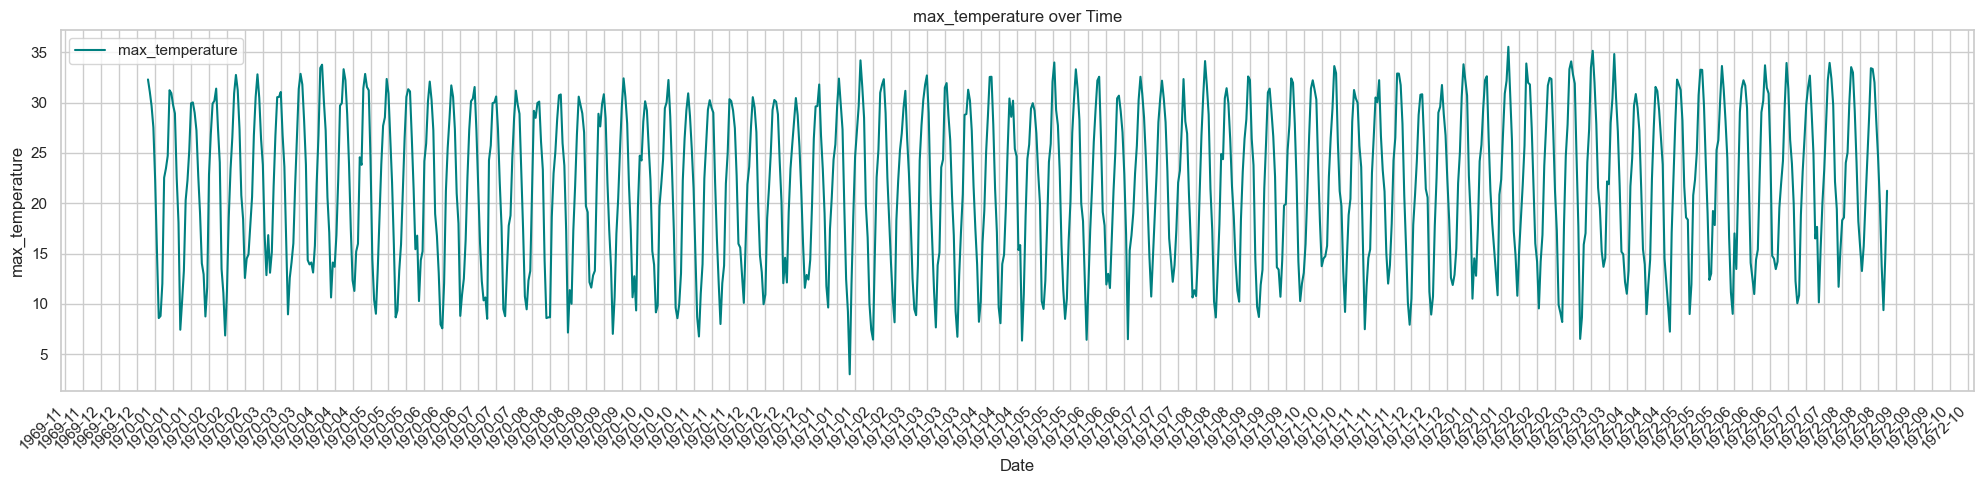

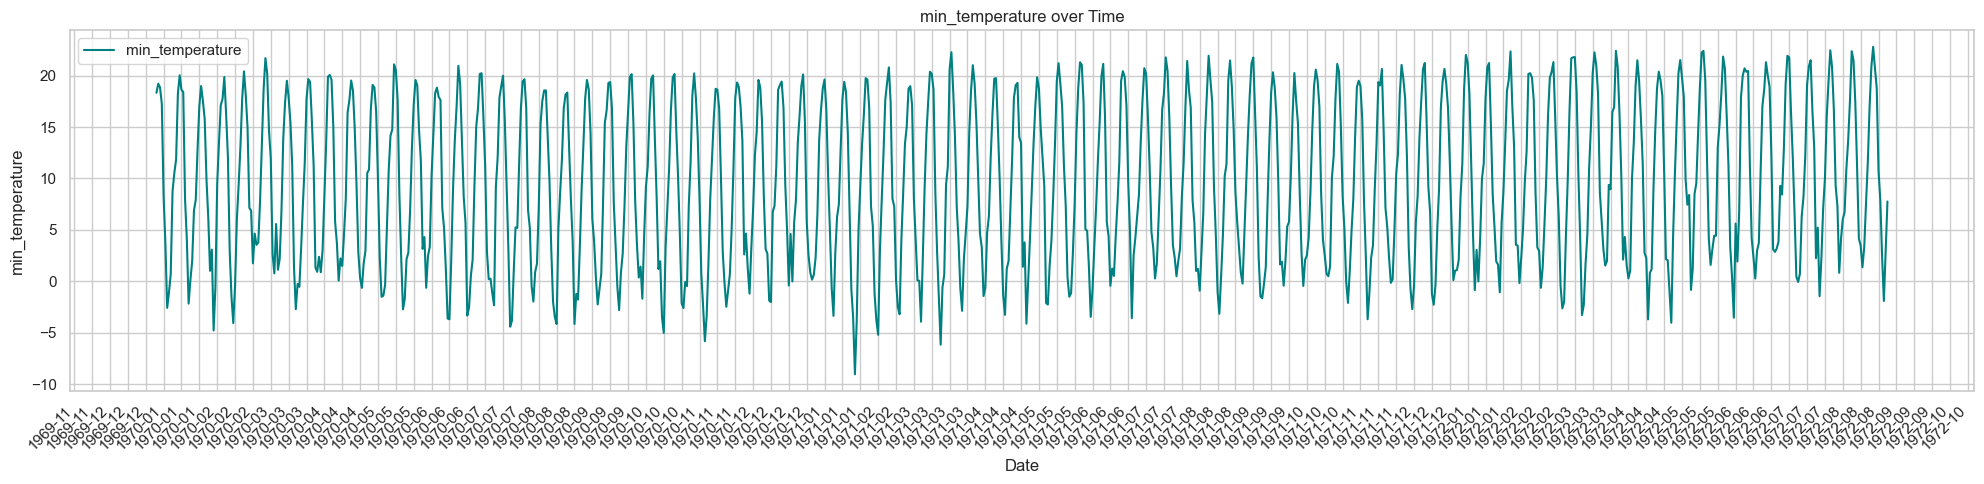

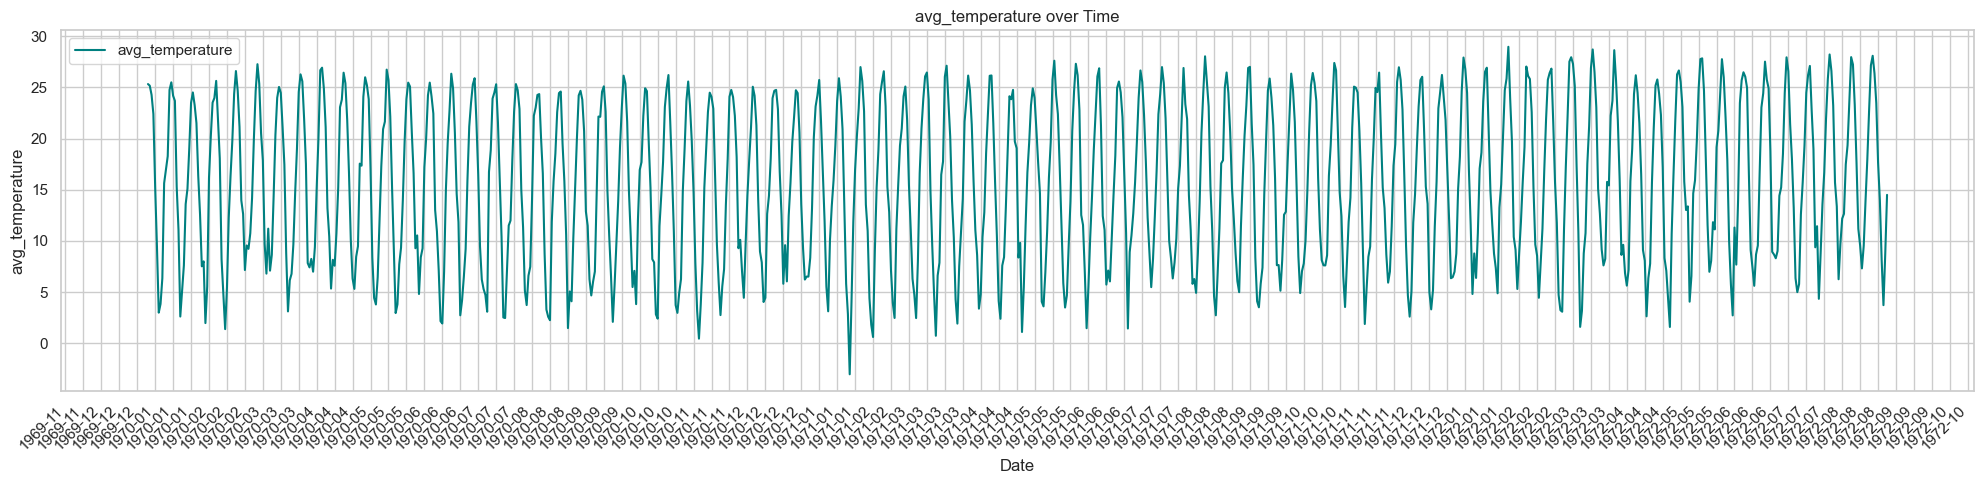

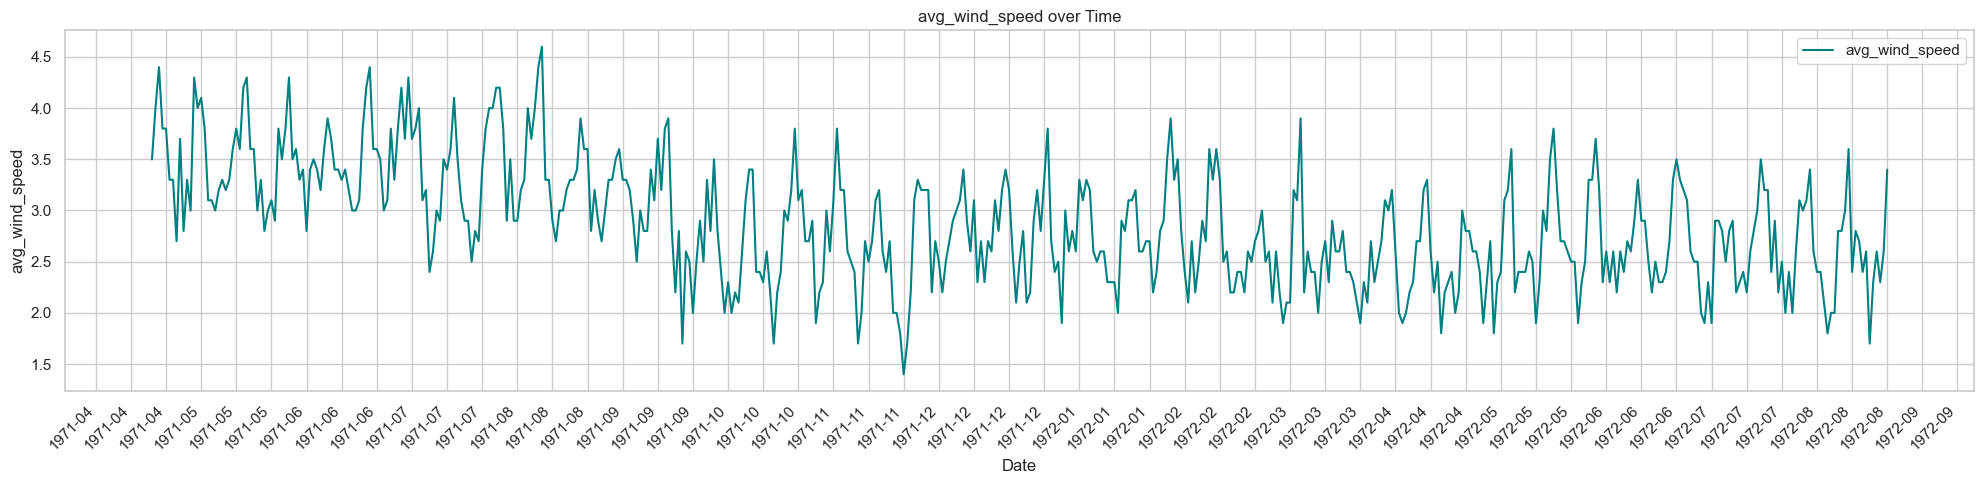

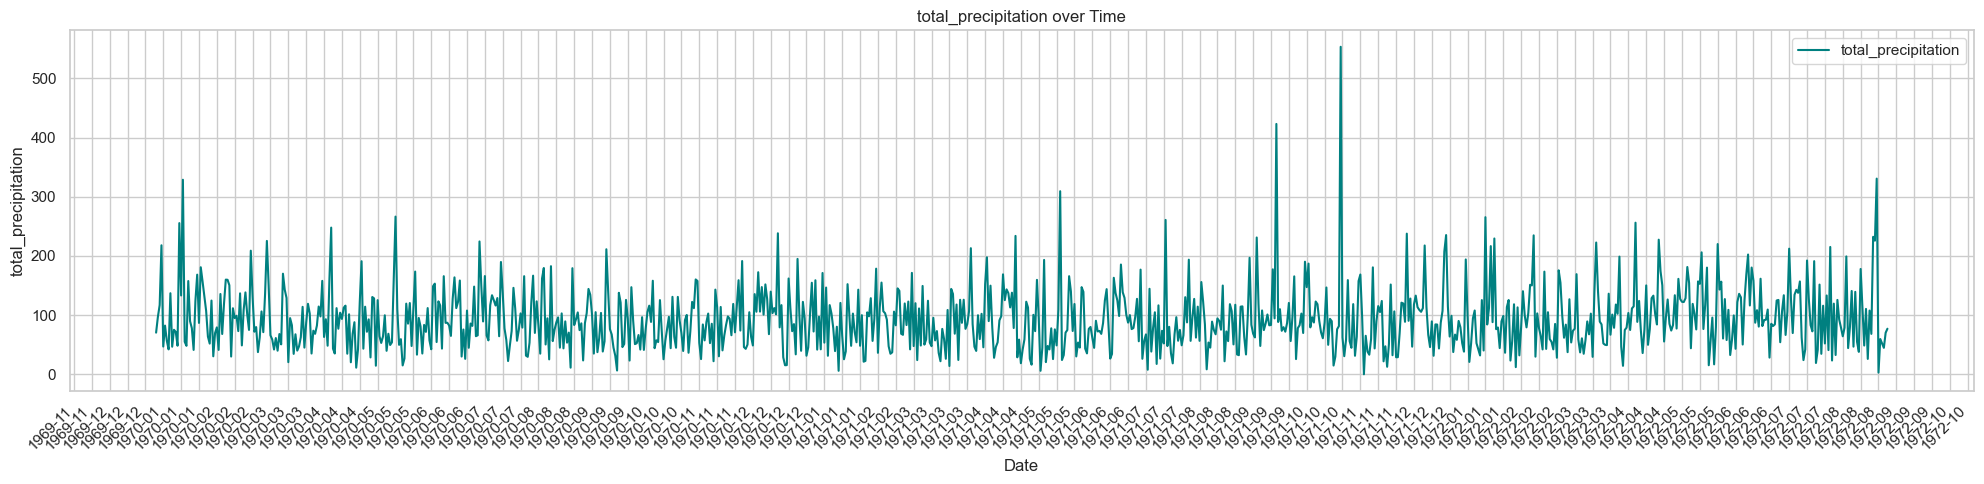

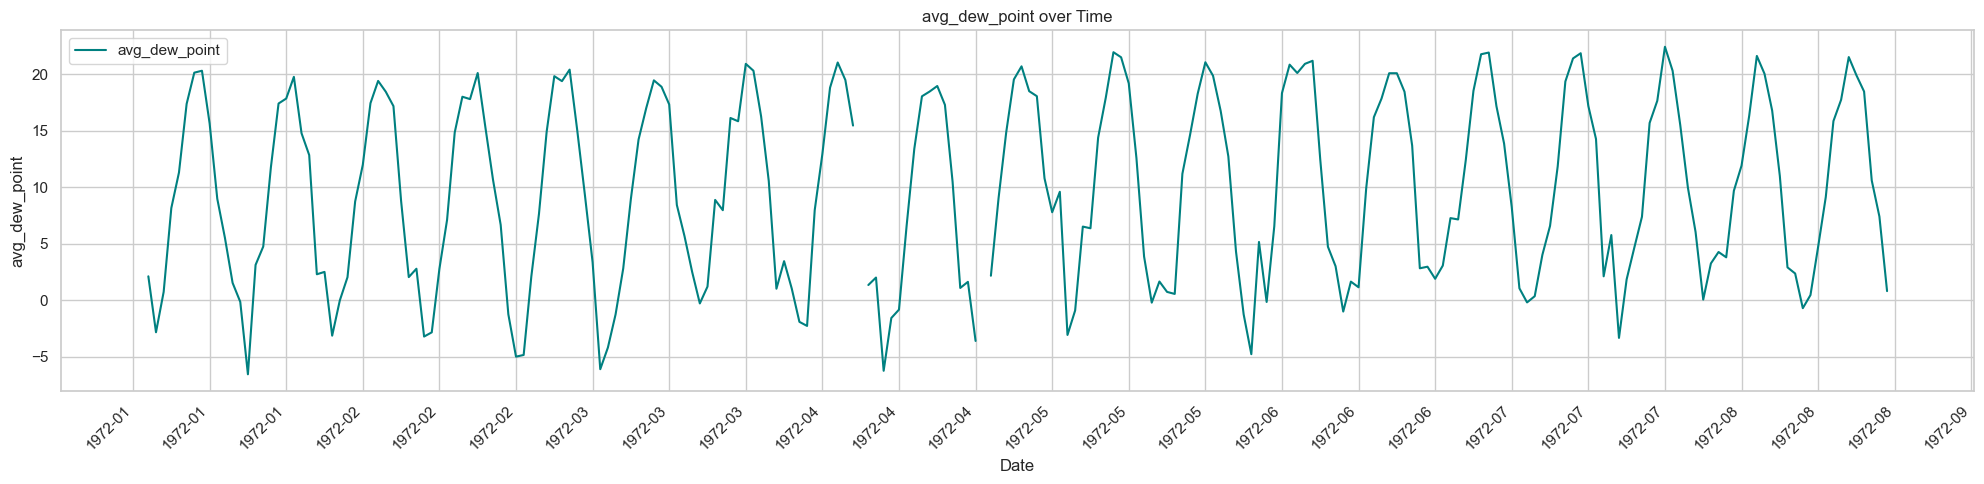

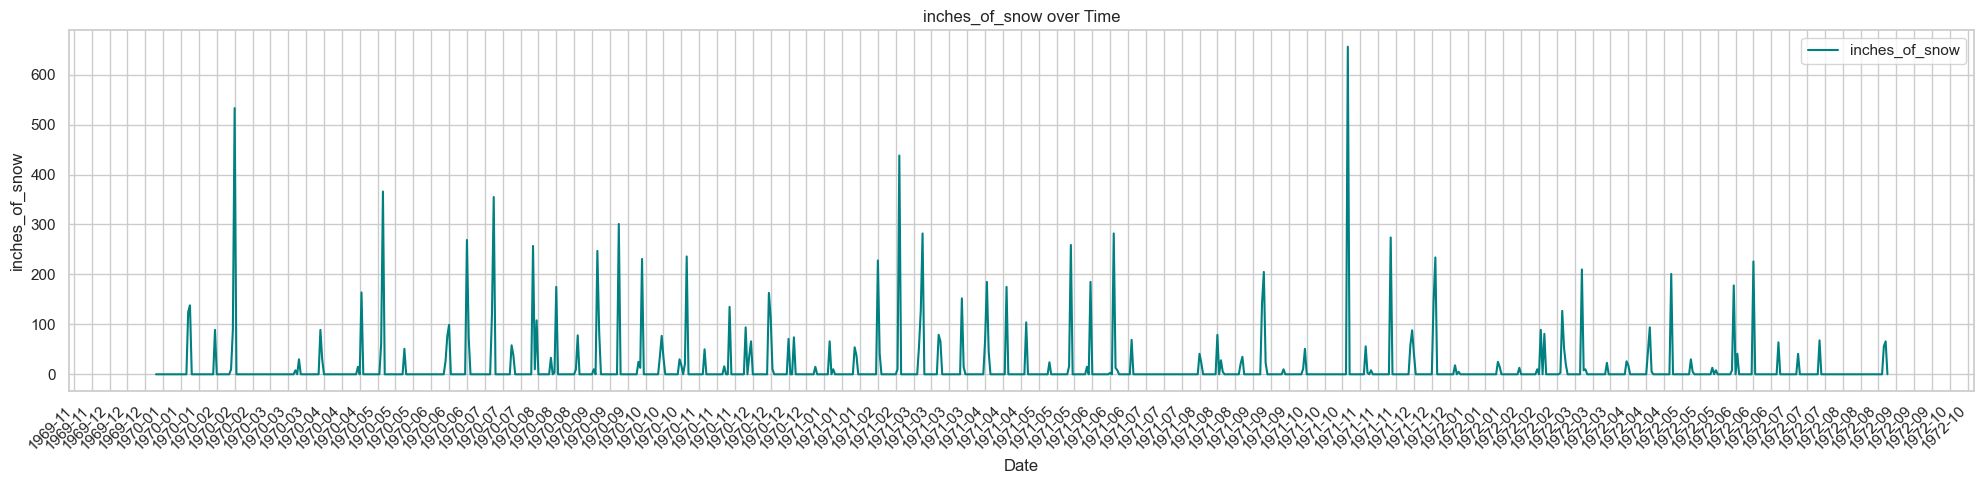

In [458]:
#loop through the features and plot
for feature in df1.columns:
    if feature != 'date' and feature != 'station_id':  
        plt.figure(figsize=(20, 5))  
        plt.plot(df1['date'], df1[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

### K-Nearest Neighbors imputation

In [459]:
# Save the 'date' column before dropping it
dates = df1['date'].reset_index(drop=True)

# Remove 'date' for imputation
df1_numeric = df1.drop(columns=['date'])

# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)

# Perform imputation
df1_imputed = imputer.fit_transform(df1_numeric)

# Convert the imputed data back into a DataFrame
df1 = pd.DataFrame(df1_imputed, columns=df1_numeric.columns)

# Add the 'date' column back to the DataFrame
df1['date'] = dates


In [460]:
df1.head()

max_temperature  min_temperature  avg_temperature  avg_wind_speed  \
0            32.31            18.33            25.32            2.94   
1            31.10            19.21            25.16            2.50   
2            29.68            18.85            24.26            2.54   
3            27.54            17.25            22.40            2.66   
4            22.29             8.25            15.27            2.88   

   total_precipitation  avg_dew_point  inches_of_snow     date  
0                 70.4         17.682             0.0  1944-06  
1                 97.0         18.384             0.0  1944-07  
2                117.0         17.752             0.0  1944-08  
3                218.0         17.532             0.0  1944-09  
4                 46.9          8.866             0.0  1944-10

### Graph all columns to help understand data and look for patterns

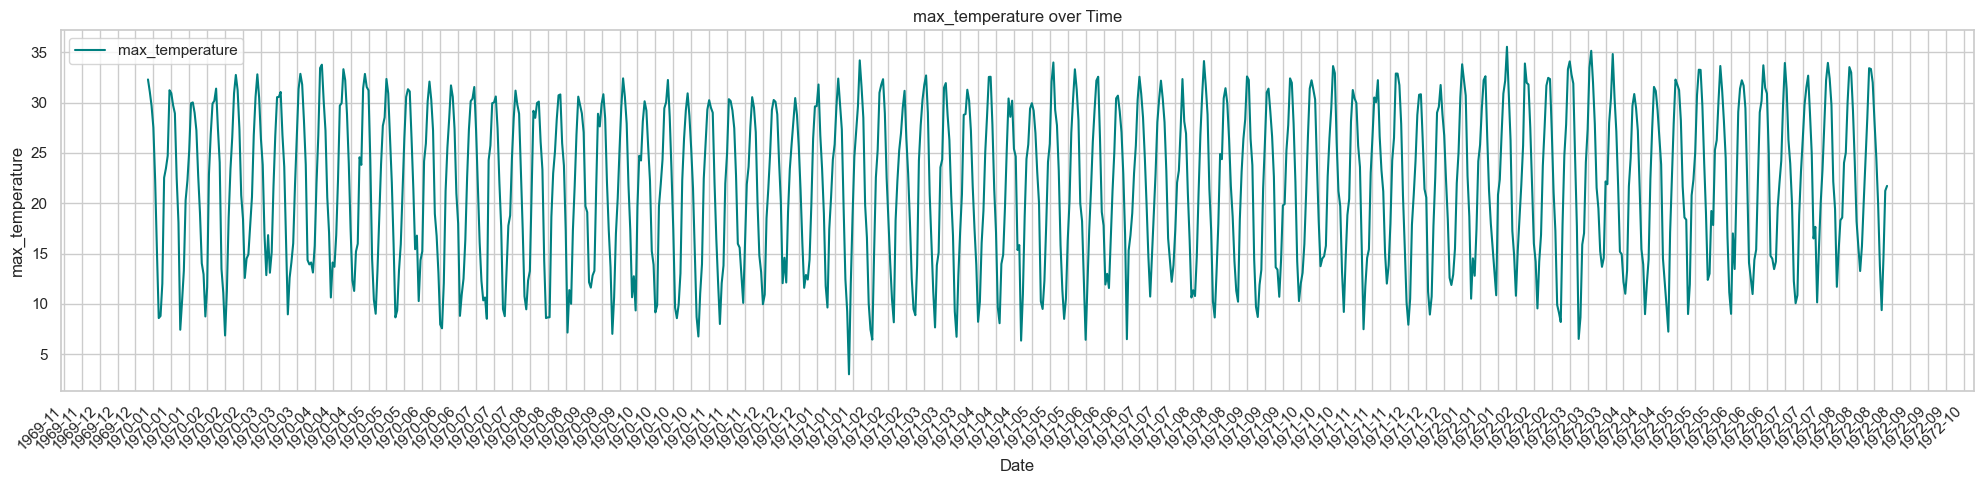

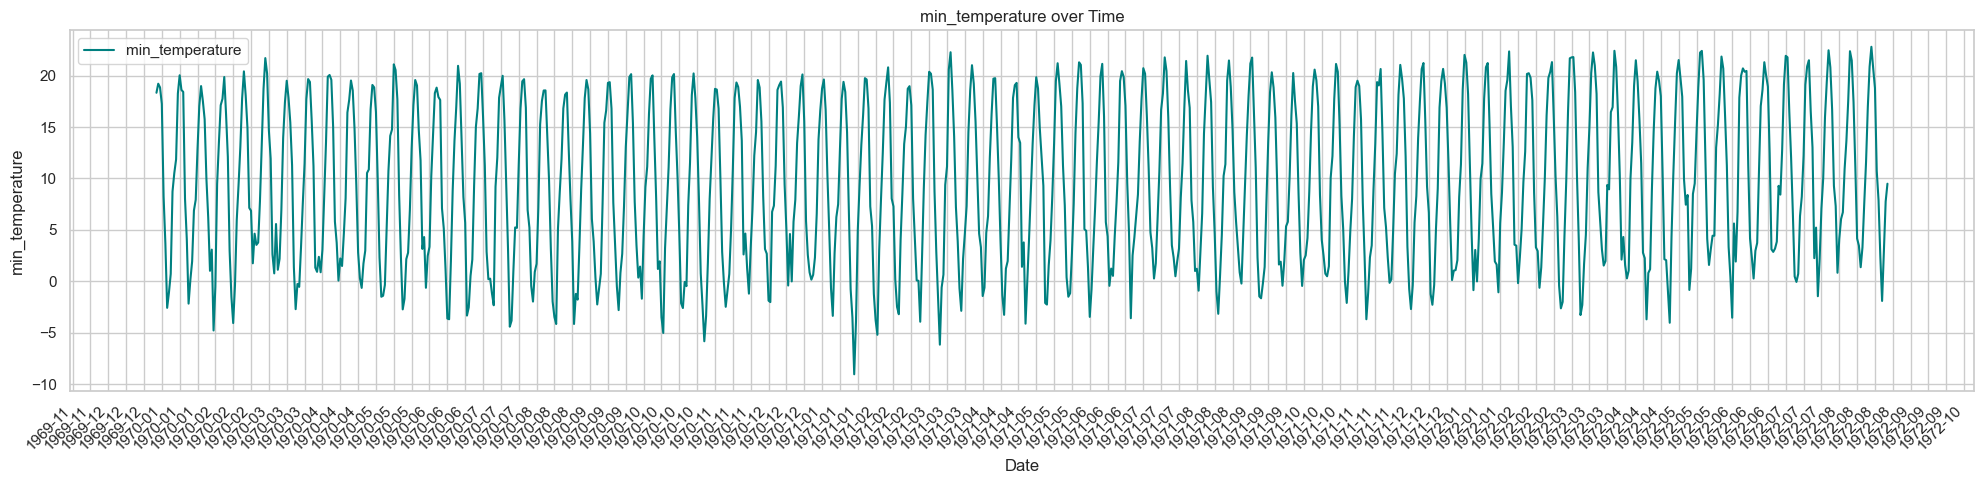

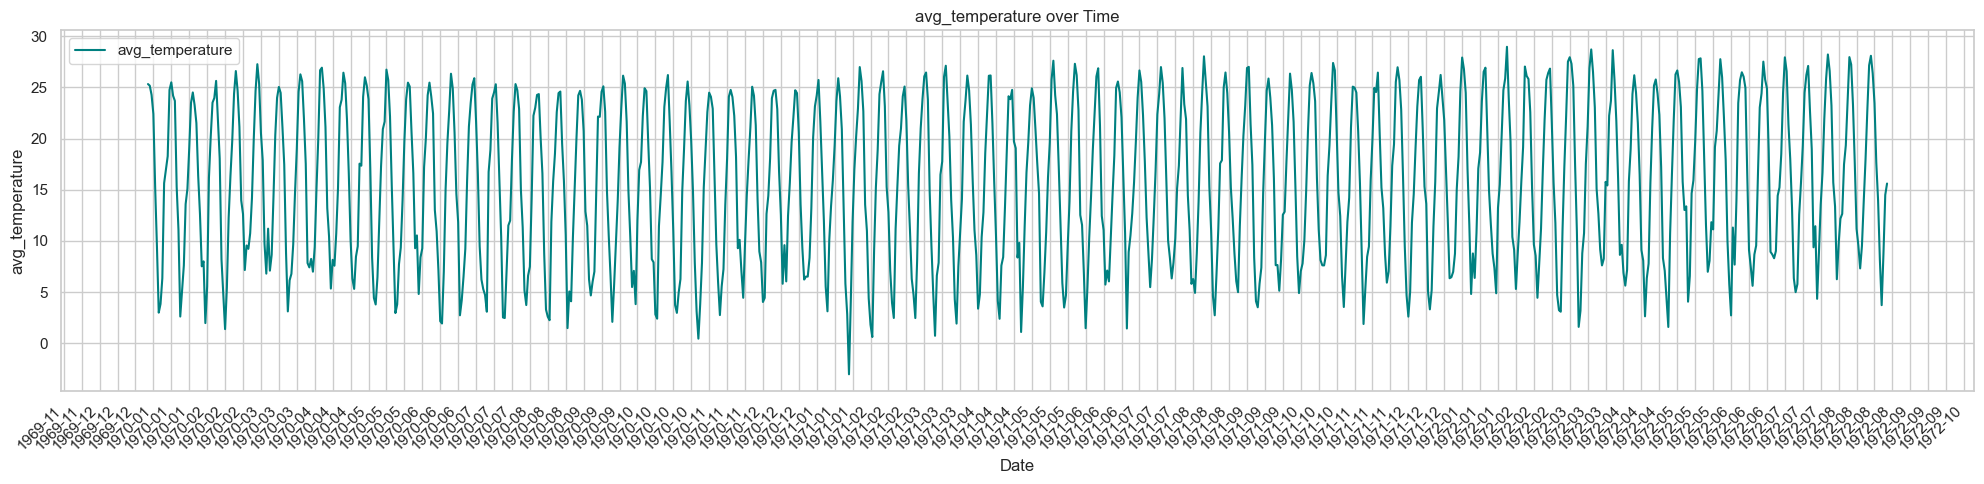

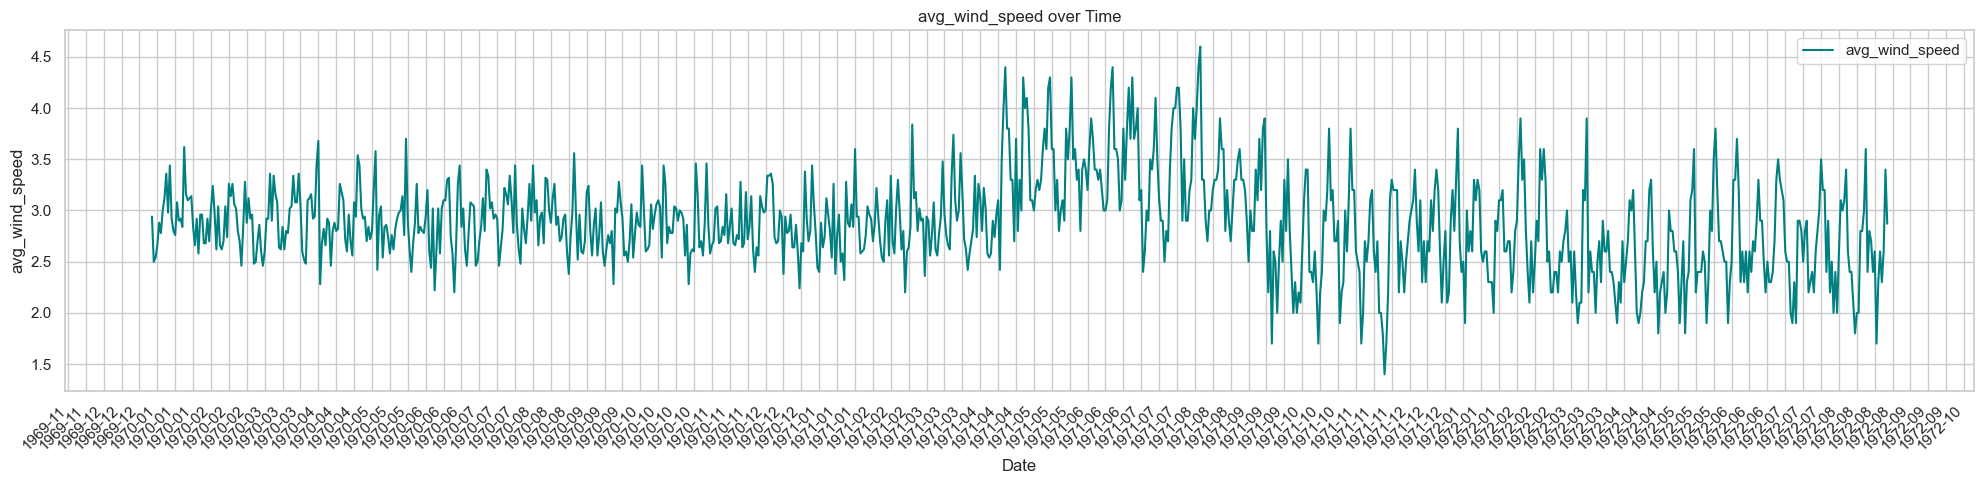

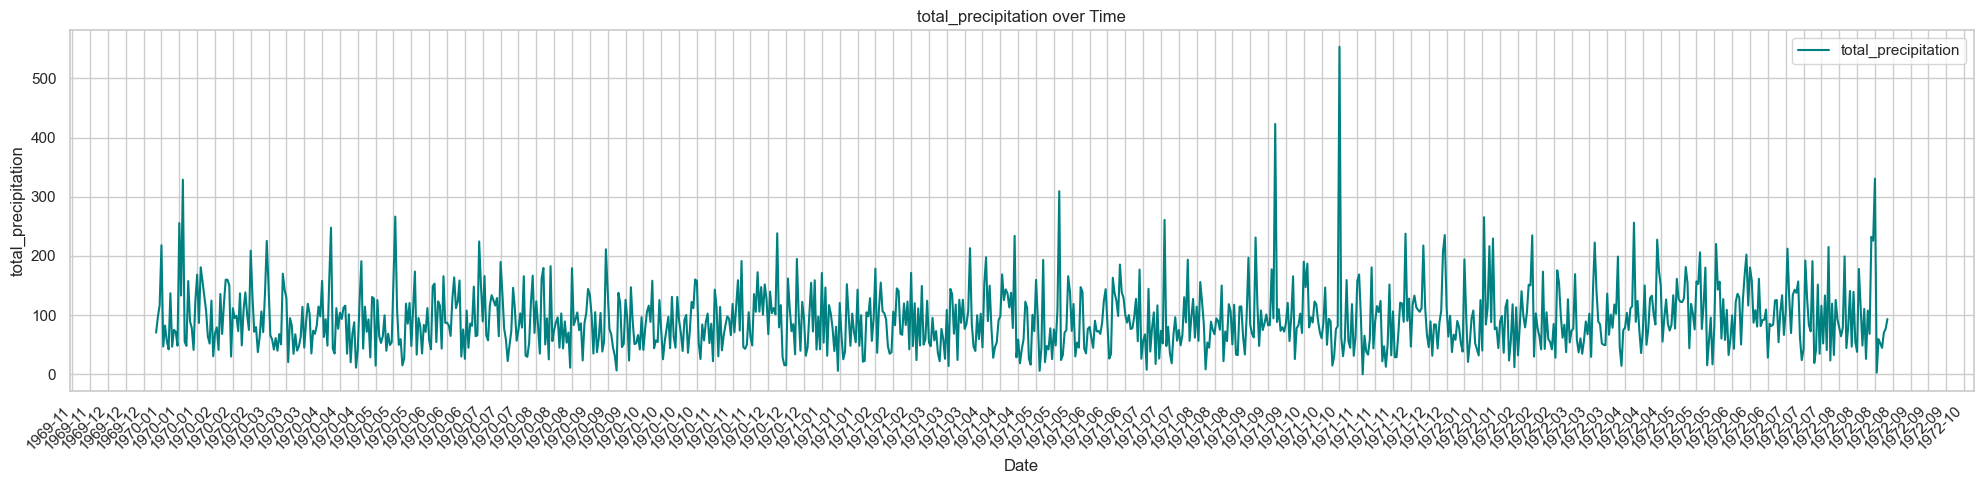

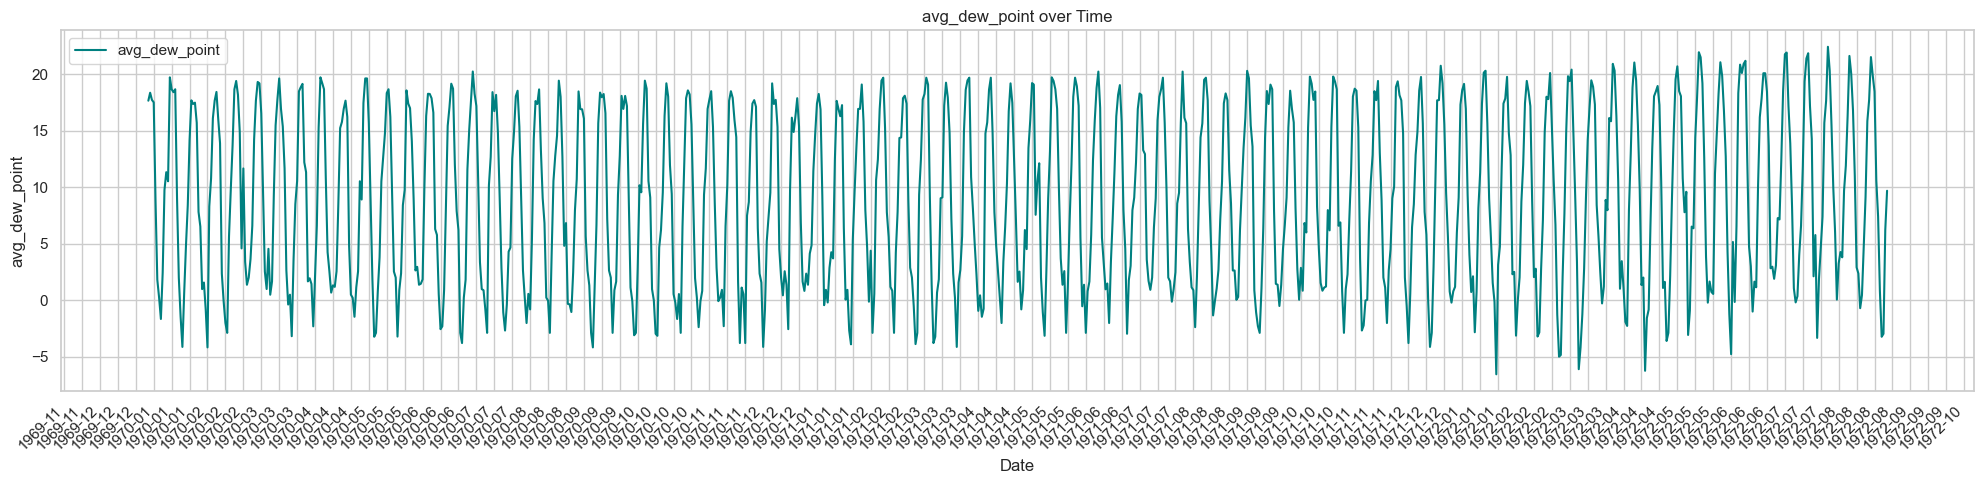

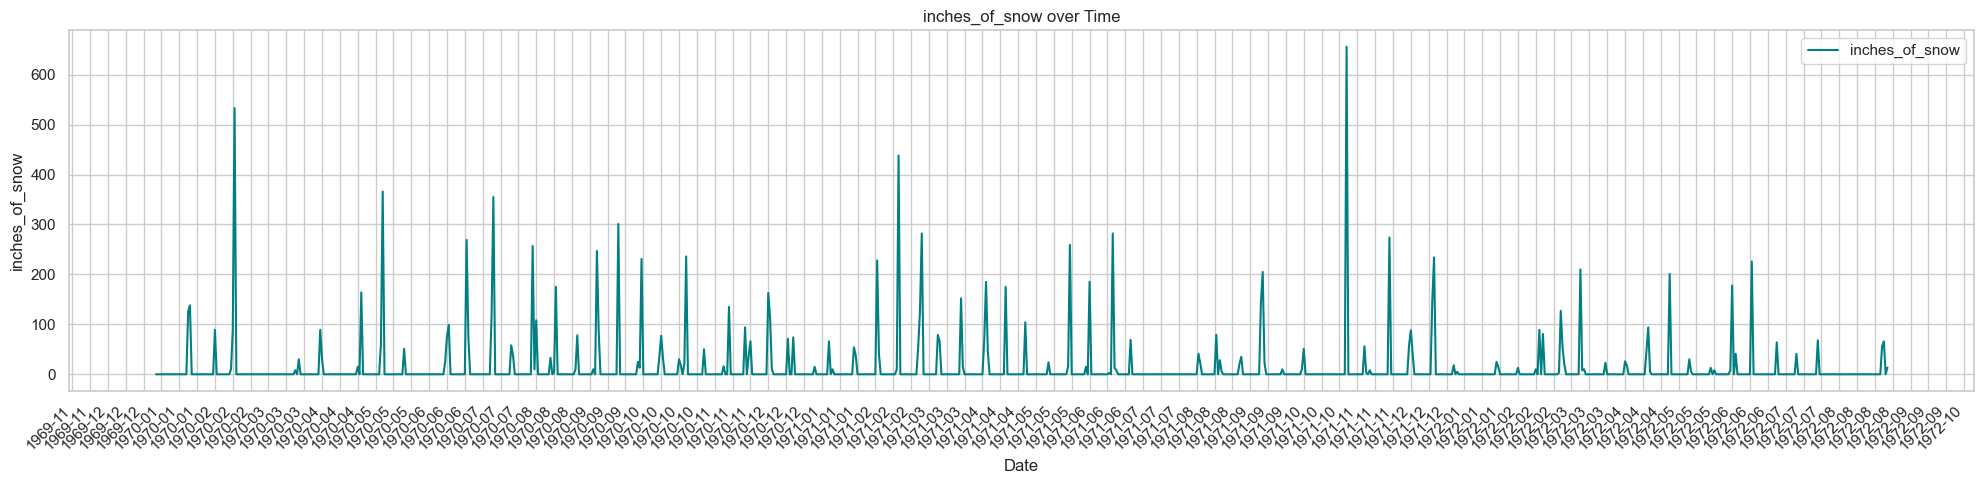

In [461]:
#loop through the features and plot
for feature in df1.columns:
    if feature != 'date':  # Skip 'date' as we are plotting other features
        plt.figure(figsize=(20, 5))  
        plt.plot(df1['date'], df1[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format date labels to show only year and month
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

        # Set the frequency of date labels to show only every 10th date
        plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

In [462]:
#Double check for missing values in imputed data
df1.isna().any(axis=1).sum()

0

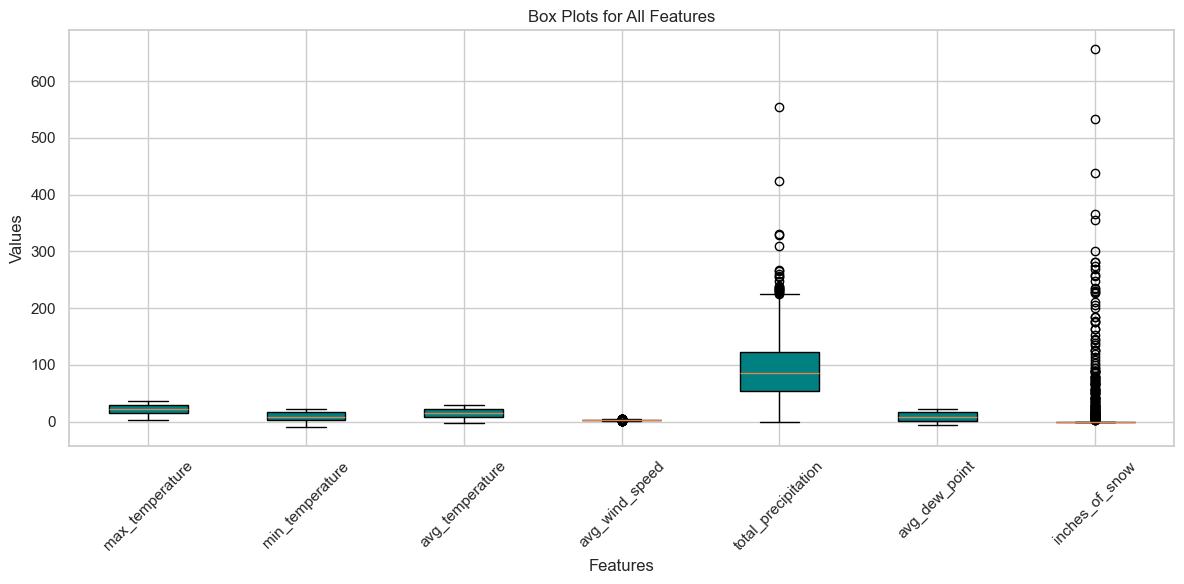

In [463]:
plt.figure(figsize=(12, 6))

# Create a box plot for each feature (excluding 'date' and 'station_id')
plt.boxplot([df1[feature] for feature in df1.columns if feature != 'date'], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(df1.columns)), [feature for feature in df1.columns if feature != 'date'], rotation=45)


plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Box Plots for All Features')


plt.tight_layout()
plt.show()


### Prepare month as the prediction feature

In [464]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m')

# Extract month
df1['month'] = df1['date'].dt.month

# Compute cyclical features
df1['month_sin'] = np.sin(2 * np.pi * df1['month'] / 12)
df1['month_cos'] = np.cos(2 * np.pi * df1['month'] / 12)

In [465]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 971 entries, 0 to 970
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   max_temperature      971 non-null    float64       
 1   min_temperature      971 non-null    float64       
 2   avg_temperature      971 non-null    float64       
 3   avg_wind_speed       971 non-null    float64       
 4   total_precipitation  971 non-null    float64       
 5   avg_dew_point        971 non-null    float64       
 6   inches_of_snow       971 non-null    float64       
 7   date                 971 non-null    datetime64[ns]
 8   month                971 non-null    int32         
 9   month_sin            971 non-null    float64       
 10  month_cos            971 non-null    float64       
dtypes: datetime64[ns](1), float64(9), int32(1)
memory usage: 79.8 KB


### Scale Data

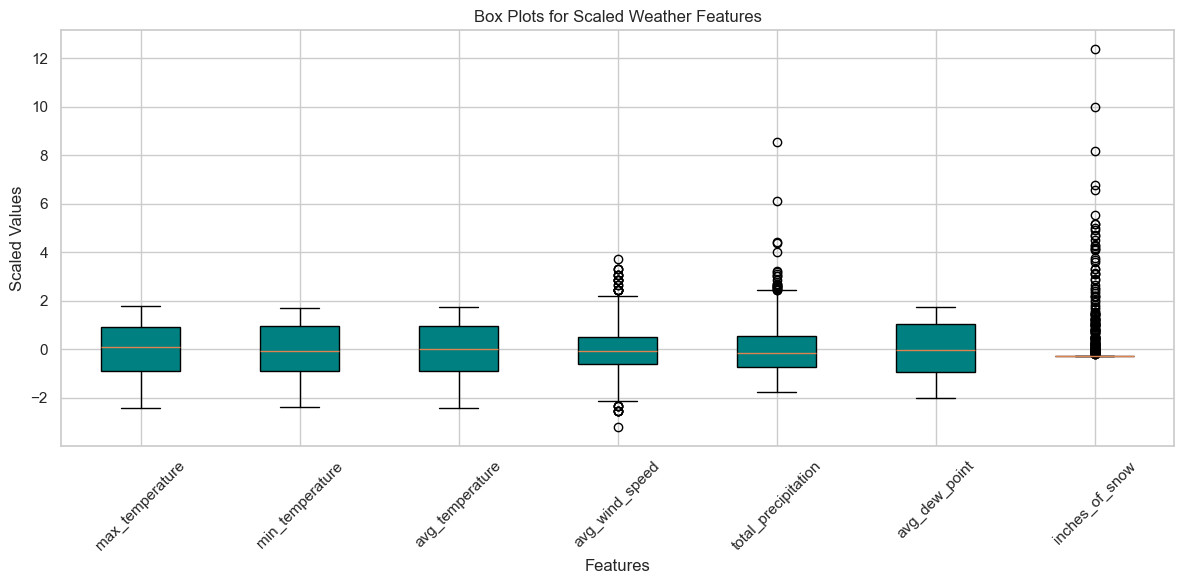

In [466]:
# Initialize the scaler
scaler1 = StandardScaler()

# Define your target columns
target_columns = ['max_temperature', 'min_temperature', 'avg_temperature', 'avg_wind_speed', 
                  'total_precipitation', 'avg_dew_point', 'inches_of_snow']

# Apply scaling to your target data (assumes 'df1' is your dataframe containing the targets)
df1_scaled = df1.copy()  # Create a copy to keep original data intact

# Fit and transform the scaler on the target columns
df1_scaled[target_columns] = scaler1.fit_transform(df1[target_columns])

# --------------------------
# Box Plot Visualization
# --------------------------
plt.figure(figsize=(12, 6))

# Prepare data for box plots (only for scaled target columns)
data_for_boxplots = [df1_scaled[feature] for feature in target_columns]

# Create box plots
plt.boxplot(data_for_boxplots, patch_artist=True, boxprops=dict(facecolor='teal', color='black'))

# Customize plot
plt.xticks(range(1, len(target_columns) + 1), target_columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.title('Box Plots for Scaled Weather Features')
plt.tight_layout()
plt.show()


Note, there is little, to no snow in this location, that is the reason why the snow features don't look scaled properly.

Save scaler

In [467]:
# Save the scaler
joblib.dump(scaler1, 'station1_scaler.pkl')
print("Scaler saved as 'station1_scaler.pkl'")

Scaler saved as 'station1_scaler.pkl'


## Station 2 data preperation

In [ ]:
# Read the original dataset
df2 = pd.read_csv('../data/Canada.csv')

In [469]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 68 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATION          320 non-null    object 
 1   DATE             320 non-null    object 
 2   LATITUDE         320 non-null    float64
 3   LONGITUDE        320 non-null    float64
 4   ELEVATION        320 non-null    float64
 5   NAME             320 non-null    object 
 6   CDSD             289 non-null    float64
 7   CDSD_ATTRIBUTES  287 non-null    object 
 8   CLDD             315 non-null    float64
 9   CLDD_ATTRIBUTES  315 non-null    object 
 10  DP01             303 non-null    float64
 11  DP01_ATTRIBUTES  303 non-null    object 
 12  DP10             303 non-null    float64
 13  DP10_ATTRIBUTES  303 non-null    object 
 14  DP1X             303 non-null    float64
 15  DP1X_ATTRIBUTES  303 non-null    object 
 16  DSND             143 non-null    float64
 17  DSND_ATTRIBUTES 

In [470]:
df2.head()

STATION     DATE  LATITUDE  LONGITUDE  ELEVATION  \
0  CA00301A001  1997-04     53.55  -114.1167      766.0   
1  CA00301A001  1997-05     53.55  -114.1167      766.0   
2  CA00301A001  1997-06     53.55  -114.1167      766.0   
3  CA00301A001  1997-07     53.55  -114.1167      766.0   
4  CA00301A001  1997-08     53.55  -114.1167      766.0   

                             NAME  CDSD CDSD_ATTRIBUTES  CLDD CLDD_ATTRIBUTES  \
0  EDMONTON STONY PLAIN CS, AB CA   NaN             NaN   0.0              ,C   
1  EDMONTON STONY PLAIN CS, AB CA   NaN             NaN   1.8             4,C   
2  EDMONTON STONY PLAIN CS, AB CA   NaN             NaN   0.4             1,C   
3  EDMONTON STONY PLAIN CS, AB CA   NaN             NaN   4.4             2,C   
4  EDMONTON STONY PLAIN CS, AB CA   NaN             NaN  14.6              ,C   

   DP01 DP01_ATTRIBUTES  DP10 DP10_ATTRIBUTES  DP1X DP1X_ATTRIBUTES  DSND  \
0   6.0              ,C   1.0              ,C   1.0              ,C   0.0   
1   6.0             3,C   3.0             3,C   0.0             3,C   NaN   
2  20.0             1,C  12.0             1,C   1.0             1,C   NaN   
3  14.0             1,C   7.0             1,C   0.0             1,C   0.0   
4  10.0              ,C   5.0              ,C   1.0              ,C   0.0   

  DSND_ATTRIBUTES  DSNW DSNW_ATTRIBUTES  DT00 DT00_ATTRIBUTES  DT32  \
0              ,C   0.0              ,C   0.0              ,C  17.0   
1             NaN   0.0             2,C   0.0             4,C   3.0   
2             NaN   0.0              ,C   0.0             1,C   0.0   
3              ,C   0.0              ,C   0.0             2,C   0.0   
4              ,C   0.0              ,C   0.0              ,C   0.0   

  DT32_ATTRIBUTES  DX32 DX32_ATTRIBUTES  DX70 DX70_ATTRIBUTES  DX90  \
0              ,C   6.0              ,C   0.0              ,C   0.0   
1             4,C   0.0             4,C   7.0             4,C   0.0   
2             1,C   0.0             1,C  11.0             1,C   0.0   
3             2,C   0.0             2,C  17.0             2,C   0.0   
4              ,C   0.0              ,C  18.0              ,C   0.0   

  DX90_ATTRIBUTES        DYNT DYNT_ATTRIBUTES        DYSD DYSD_ATTRIBUTES  \
0              ,C  19970407.0             ,,C  19970405.0            +,,C   
1             4,C  19970522.0           +,4,C         NaN             NaN   
2             1,C  19970629.0            ,1,C         NaN             NaN   
3             2,C  19970702.0            ,2,C  19970731.0            +,,C   
4              ,C  19970818.0             ,,C  19970831.0            +,,C   

         DYSN DYSN_ATTRIBUTES        DYXP DYXP_ATTRIBUTES        DYXT  \
0  19970403.0             ,,C  19970420.0             ,,C  19970416.0   
1  19970517.0            ,2,C  19970529.0            ,3,C  19970531.0   
2  19970630.0            +,,C  19970622.0            ,1,C  19970615.0   
3  19970731.0            +,,C  19970712.0            ,1,C  19970721.0   
4  19970831.0            +,,C  19970815.0             ,,C  19970806.0   

  DYXT_ATTRIBUTES  EMNT EMNT_ATTRIBUTES  EMSD EMSD_ATTRIBUTES  EMSN  \
0             ,,C -15.4          ,C,07,  20.0        ,,C,05,+  14.0   
1            ,4,C  -0.2        4,C,22,+   NaN             NaN   0.0   
2            ,1,C   4.7         1,C,29,   NaN             NaN   0.0   
3            ,2,C   6.5         2,C,02,   0.0        ,,C,31,+   0.0   
4             ,,C   6.8          ,C,18,   0.0        ,,C,31,+   0.0   

  EMSN_ATTRIBUTES  EMXP EMXP_ATTRIBUTES  EMXT EMXT_ATTRIBUTES   HDSD  \
0         ,,C,03,  26.4         ,,C,20,  20.3          ,C,16,    NaN   
1       2,T,C,17,   6.4        3,,C,29,  25.8         4,C,31,    NaN   
2        ,,C,30,+  45.0        1,,C,22,  25.1         1,C,15,    NaN   
3        ,,C,31,+  12.2        1,,C,12,  27.0         2,C,21,   68.7   
4        ,,C,31,+  26.4         ,,C,15,  31.2          ,C,06,  151.5   

  HDSD_ATTRIBUTES   HTDD HTDD_ATTRIBUTES   PRCP PRCP_ATTRIBUTES  SNOW  \
0            

In [471]:
# Select the columns
columns = ['DATE', 'TMAX', 'TMIN', 'TAVG', 'WSFG', 'PRCP', 'SNOW']
df2 = df2[columns]

# Rename columns to more readable names
df2 = df2.rename(columns={
    'DATE': 'date',
    'TMAX': 'max_temperature',
    'TMIN': 'min_temperature',
    'TAVG': 'avg_temperature',
    'WSFG': 'max_wind_speed',
    'PRCP': 'total_precipitation',
    'SNOW': 'inches_of_snow'
})


In [472]:
df2.head()

date  max_temperature  min_temperature  avg_temperature  max_wind_speed  \
0  1997-04             7.79            -3.39             2.20             NaN   
1  1997-05            15.65             4.77            10.21             NaN   
2  1997-06            19.10             9.76            14.43             NaN   
3  1997-07            21.56            10.67            16.11             NaN   
4  1997-08            21.76            10.50            16.13             NaN   

   total_precipitation  inches_of_snow  
0                 33.4            24.0  
1                 16.0             0.0  
2                166.2             0.0  
3                 58.8             0.0  
4                 51.8             0.0

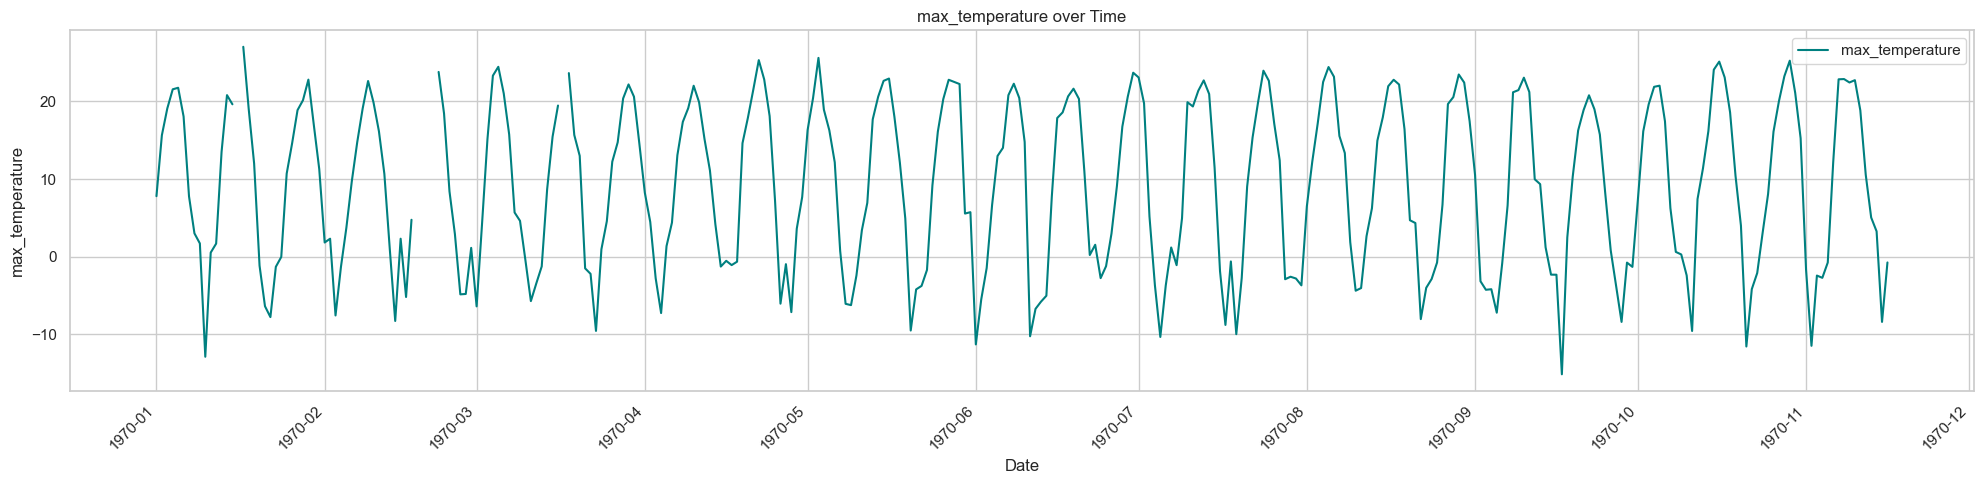

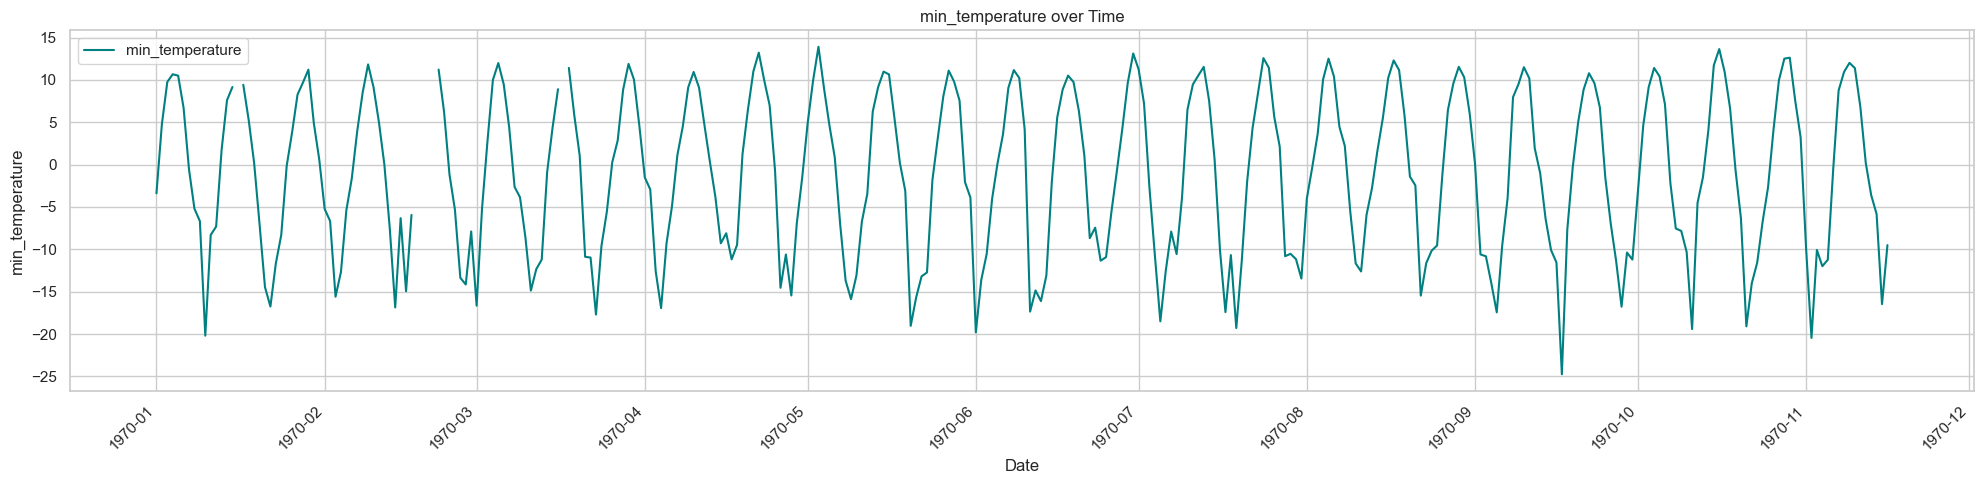

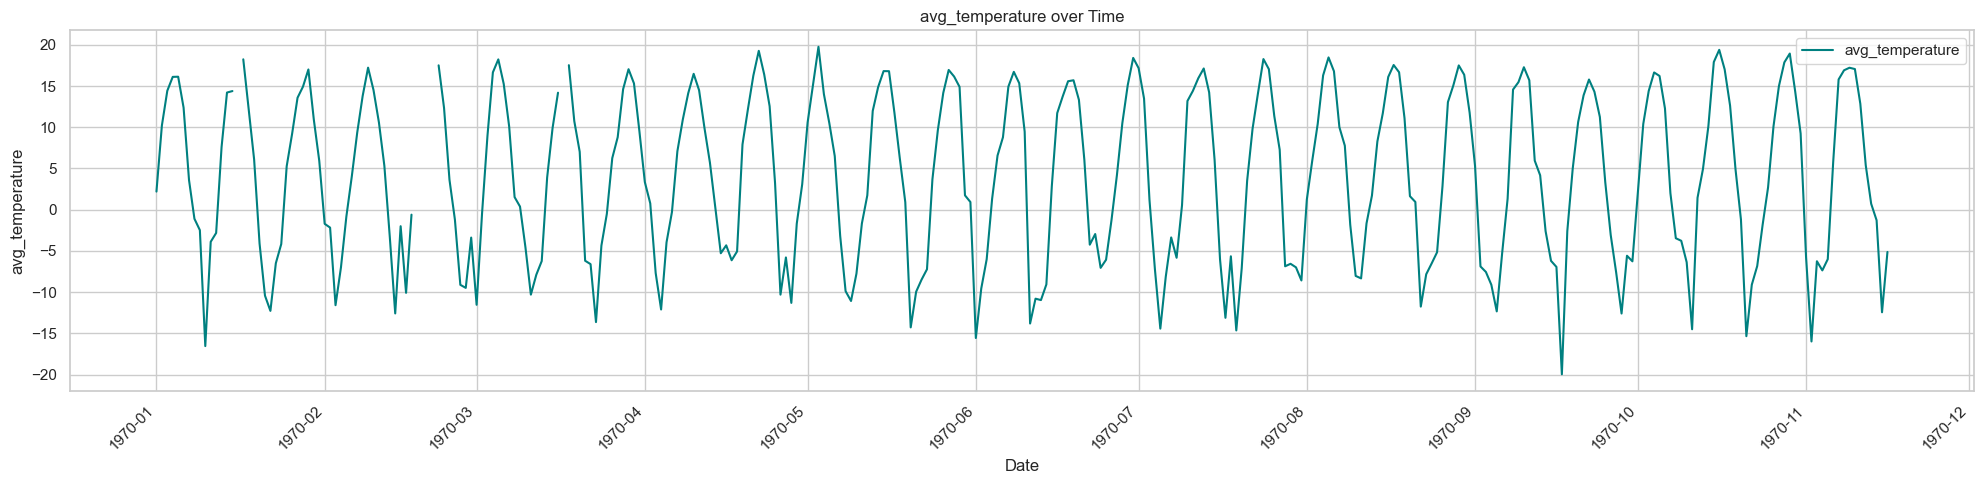

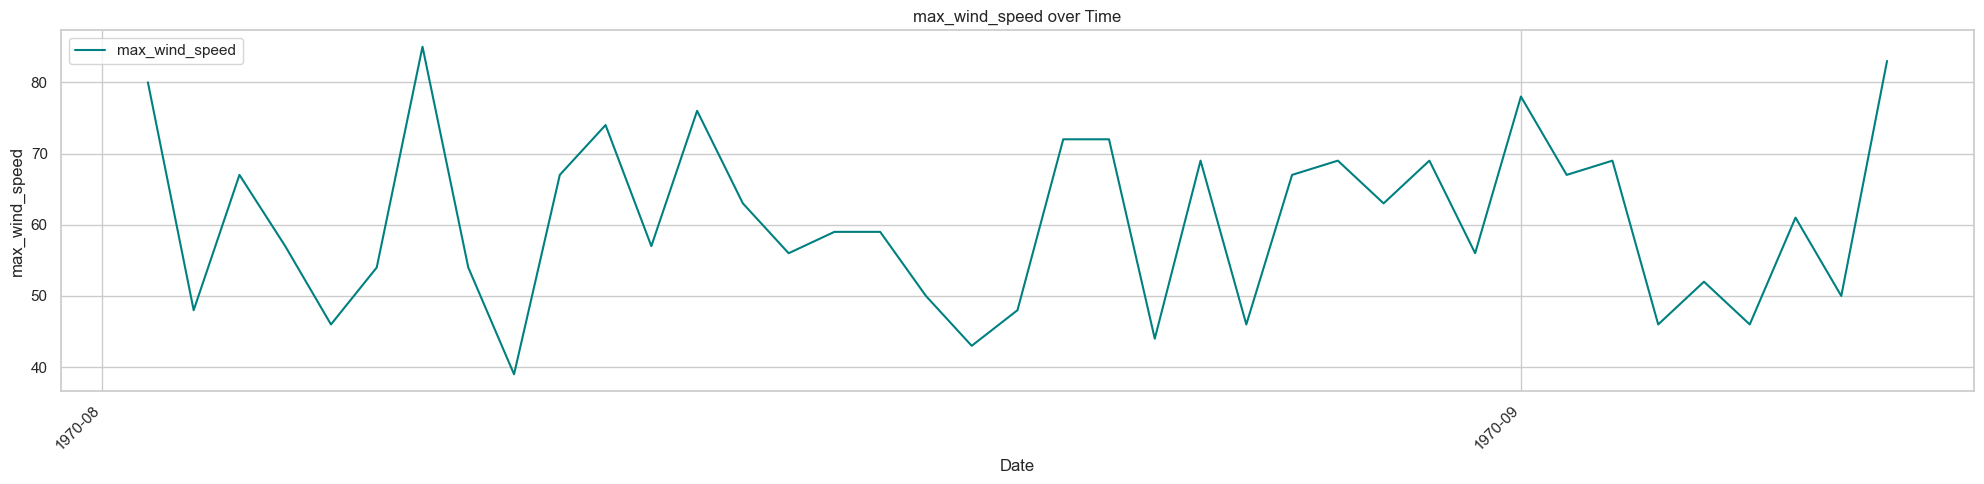

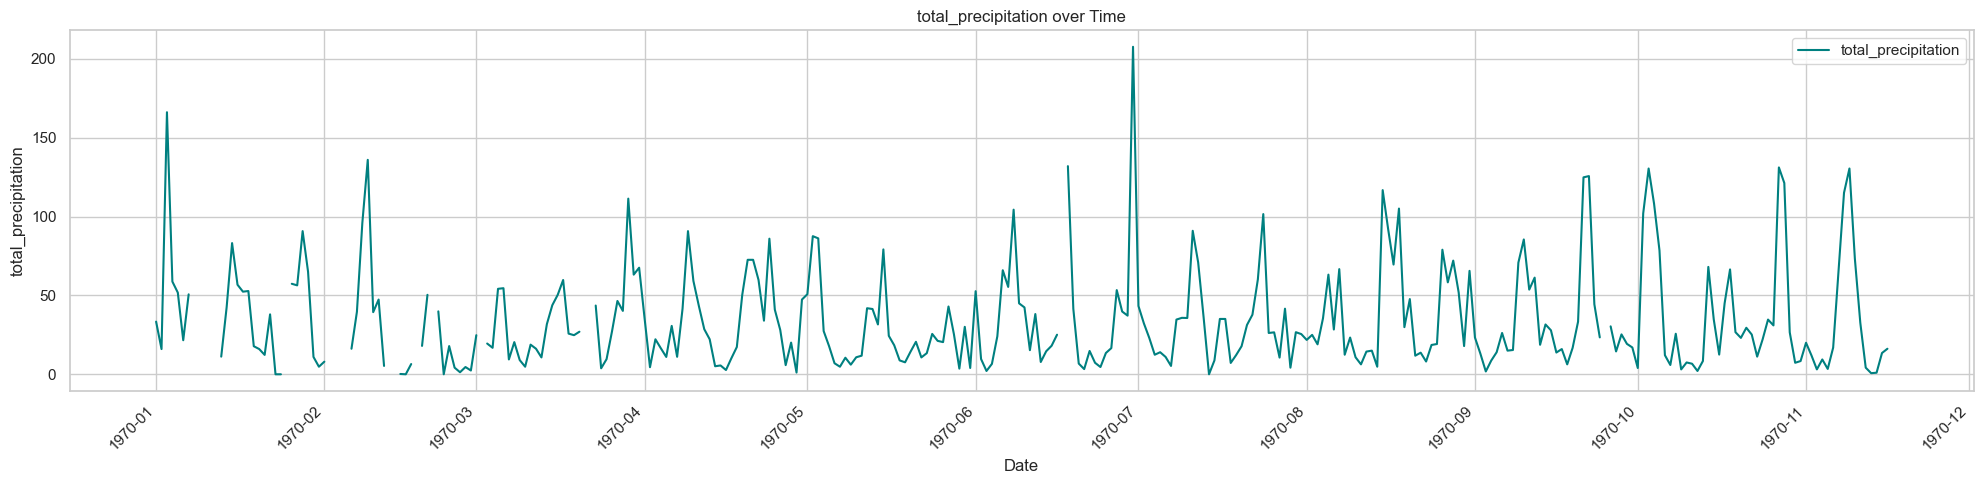

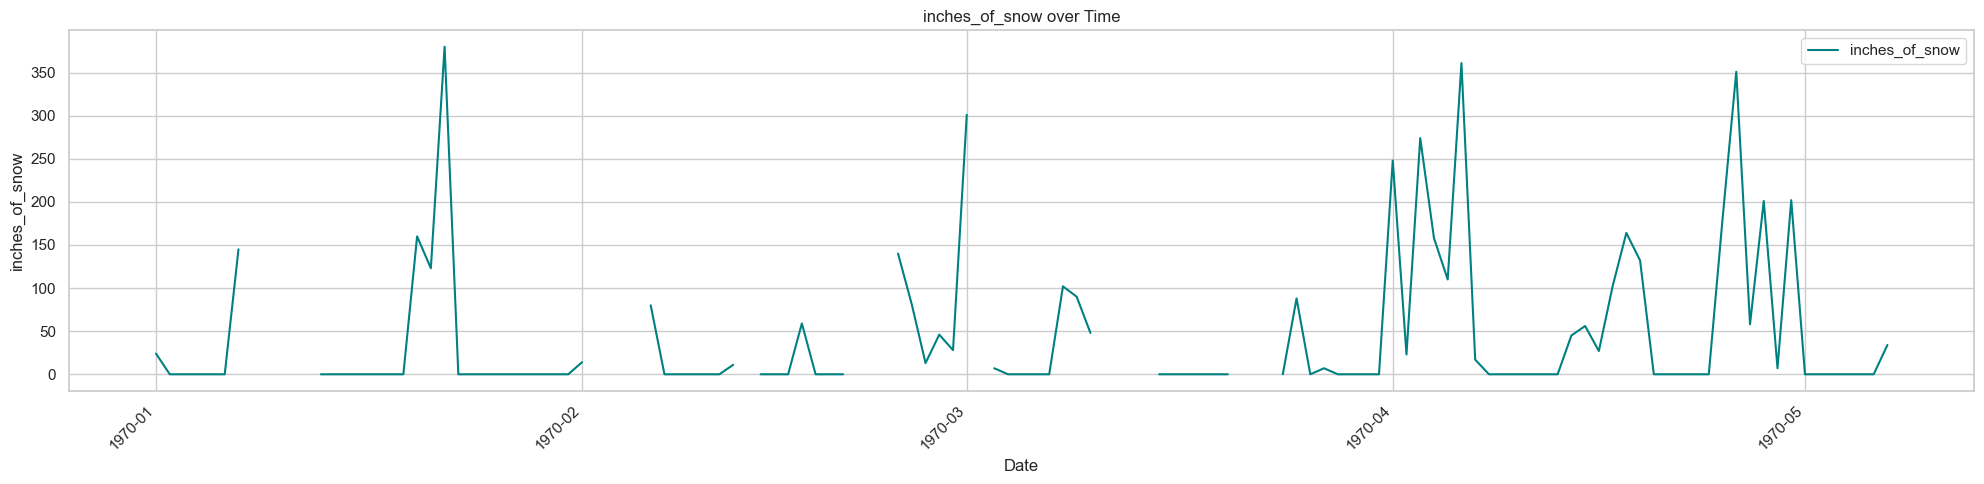

In [473]:
# Loop through the features and plot them over time
for feature in df2.columns:
    if feature not in ['date', 'station_id']:  
        plt.figure(figsize=(20, 5))  
        plt.plot(df2['date'], df2[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature)
        plt.title(f'{feature} over Time')

        # Format x-axis for monthly ticks
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()


In [474]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 320 non-null    object 
 1   max_temperature      315 non-null    float64
 2   min_temperature      315 non-null    float64
 3   avg_temperature      315 non-null    float64
 4   max_wind_speed       39 non-null     float64
 5   total_precipitation  303 non-null    float64
 6   inches_of_snow       109 non-null    float64
dtypes: float64(6), object(1)
memory usage: 17.6+ KB


### Imputation

In [475]:

# Columns in your dataset
numeric_columns = [
    'max_temperature',
    'min_temperature',
    'avg_temperature',
    'max_wind_speed',
    'total_precipitation',
    'inches_of_snow'
]

# Separate date column and numeric features
df_dates = df2[['date']].reset_index(drop=True)
df_numeric = df2[numeric_columns]

# Initialize and apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
imputed_array = imputer.fit_transform(df_numeric)

# Convert imputed array back to DataFrame
df_imputed_numeric = pd.DataFrame(imputed_array, columns=numeric_columns, index=df2.index)

# Reattach the date column
df2 = pd.concat([df_dates, df_imputed_numeric], axis=1)

# Final check
print(df2.head())
print(f"Missing values after imputation: {df2.isna().sum().sum()}")

      date  max_temperature  min_temperature  avg_temperature  max_wind_speed  \
0  1997-04             7.79            -3.39             2.20            60.2   
1  1997-05            15.65             4.77            10.21            66.0   
2  1997-06            19.10             9.76            14.43            58.6   
3  1997-07            21.56            10.67            16.11            60.4   
4  1997-08            21.76            10.50            16.13            62.0   

   total_precipitation  inches_of_snow  
0                 33.4            24.0  
1                 16.0             0.0  
2                166.2             0.0  
3                 58.8             0.0  
4                 51.8             0.0  
Missing values after imputation: 0


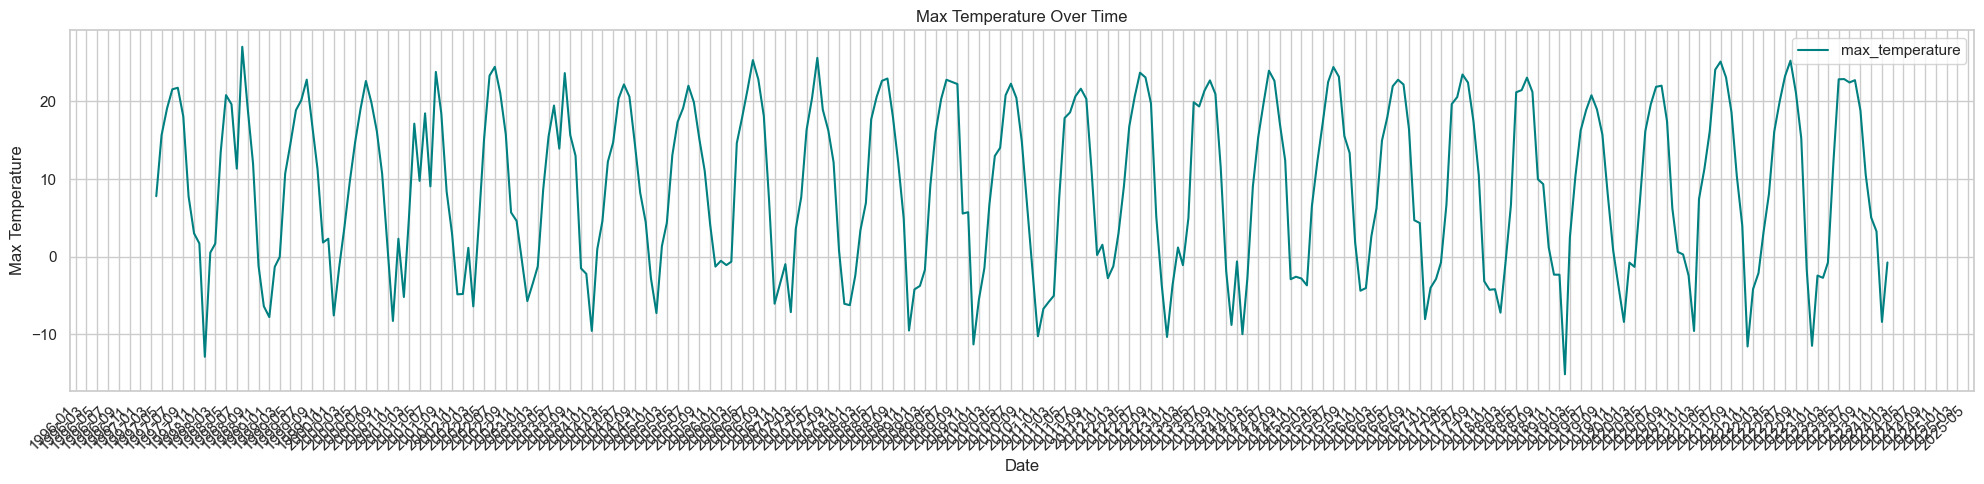

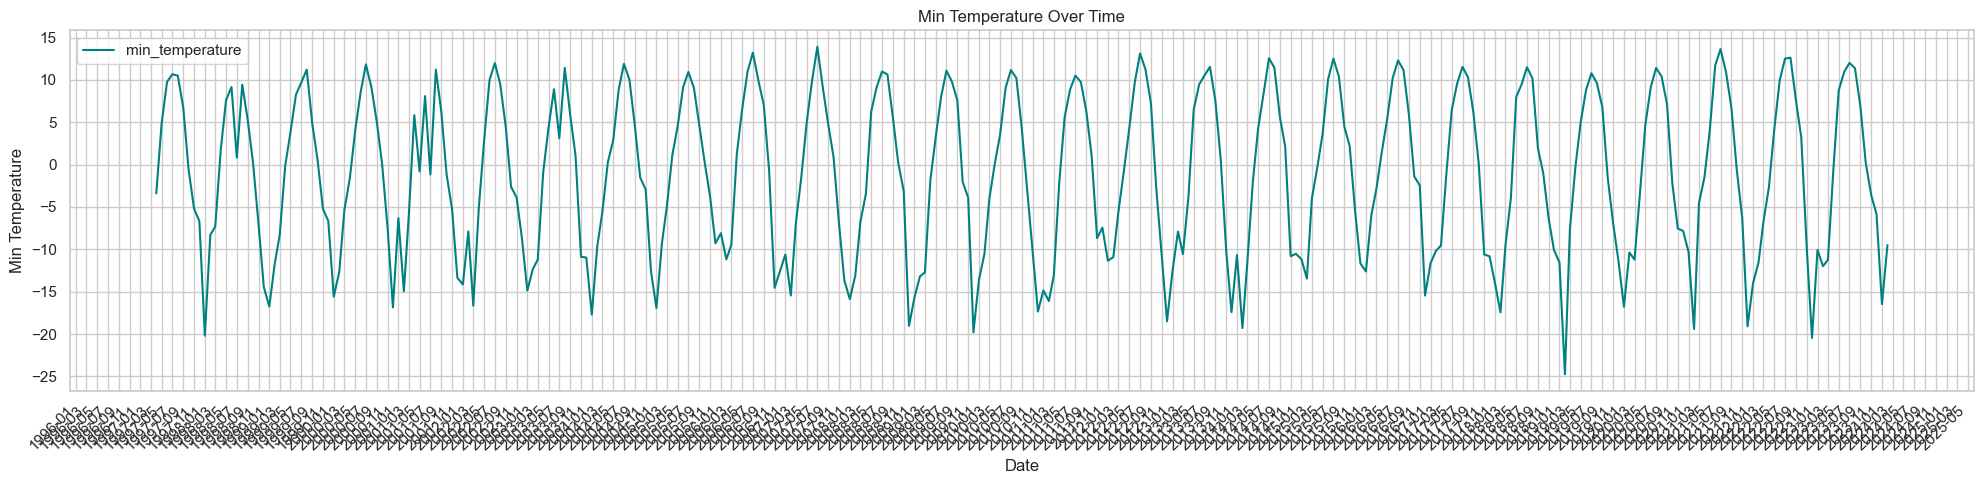

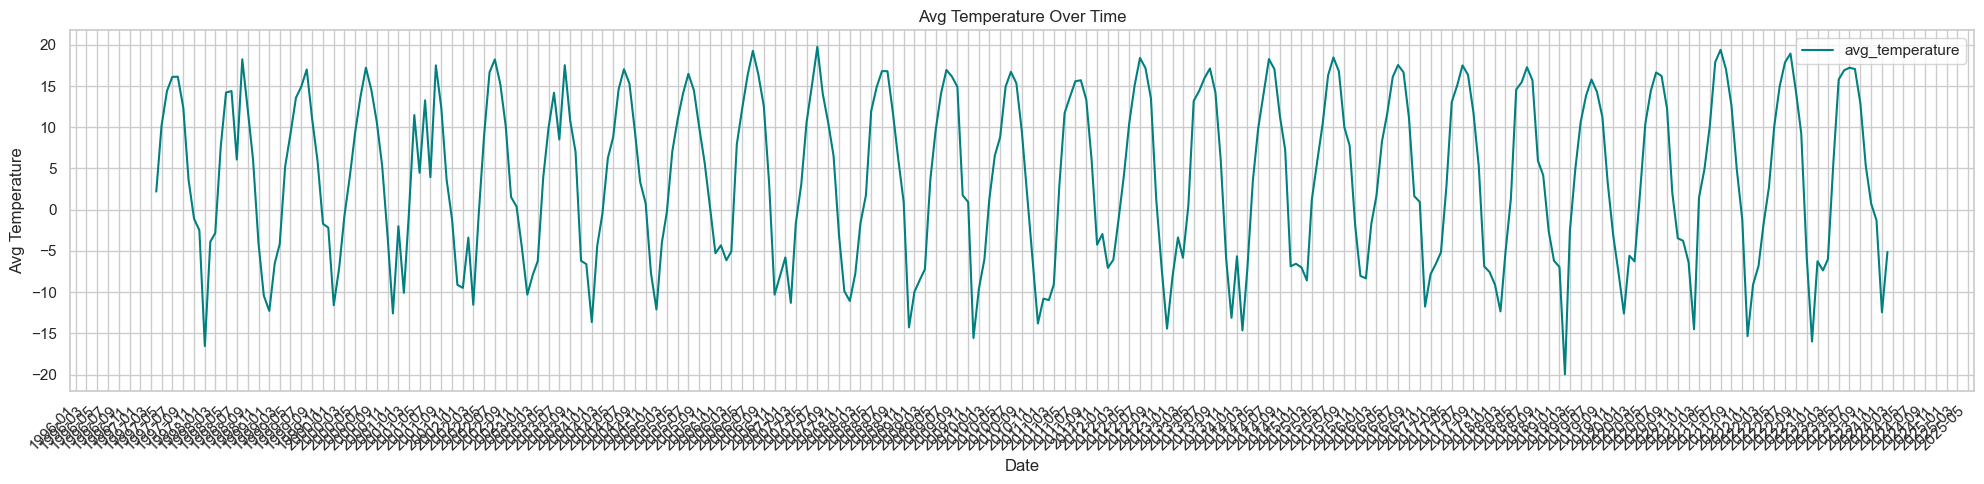

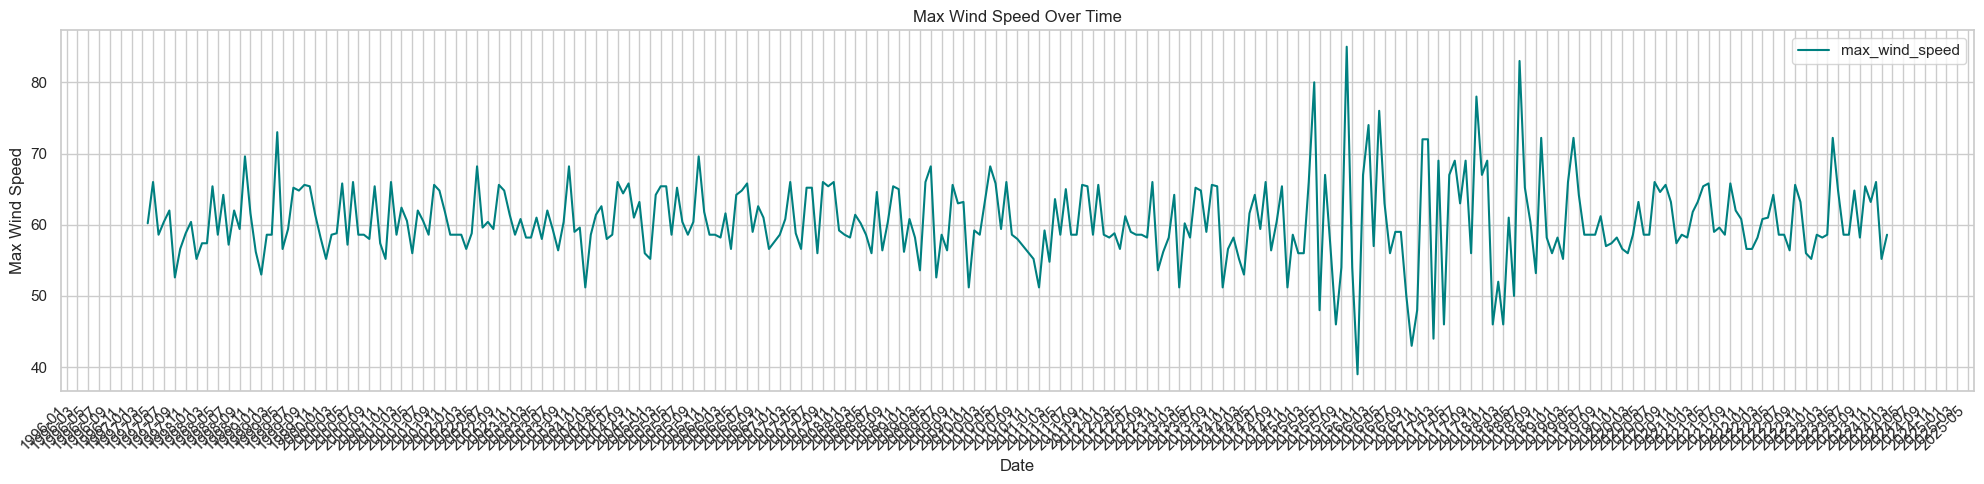

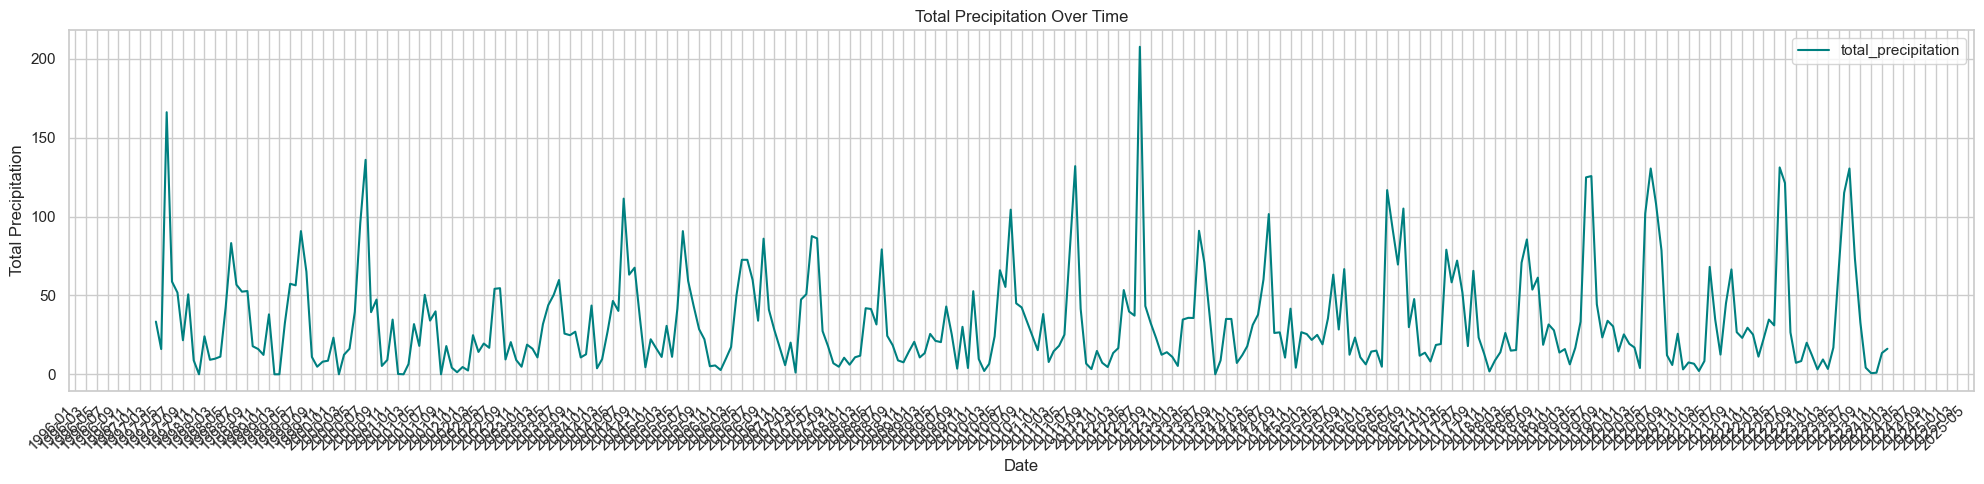

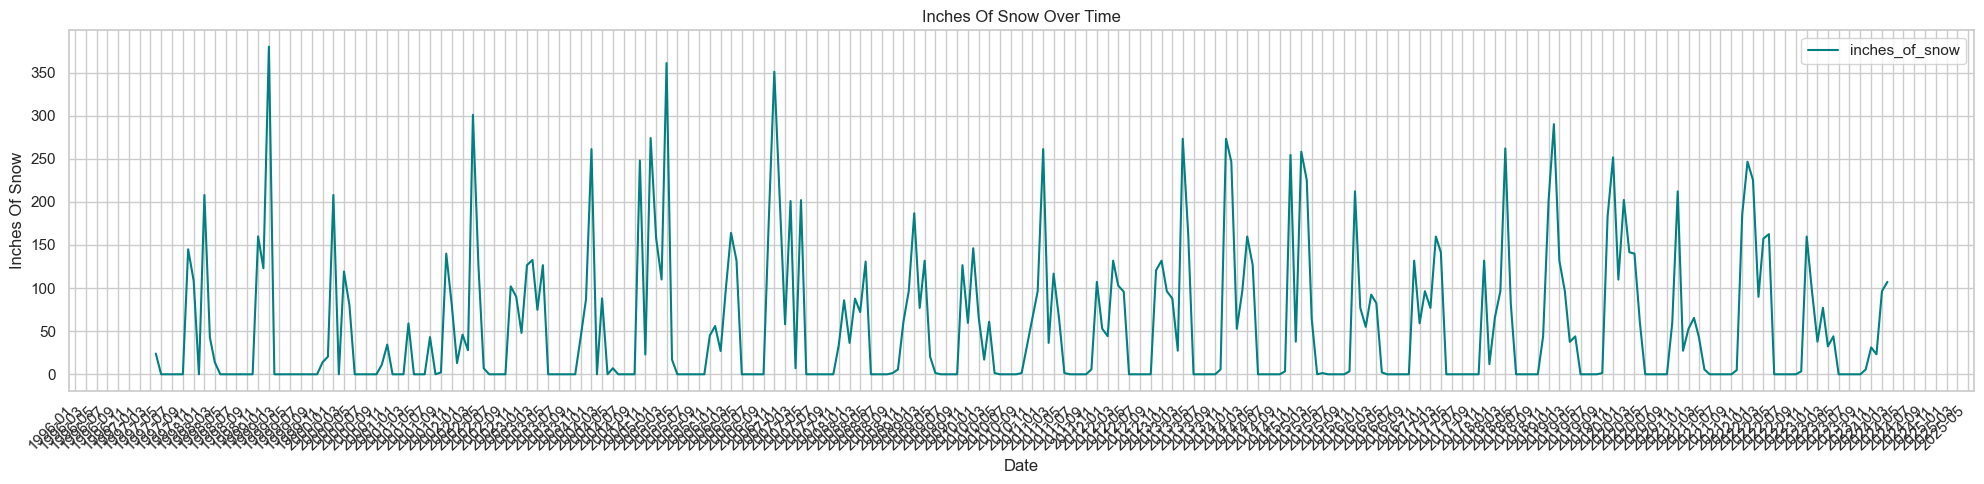

In [476]:
# Ensure date column is datetime
df2['date'] = pd.to_datetime(df2['date'])

# Loop through all features except 'date'
for feature in df2.columns:
    if feature != 'date':
        plt.figure(figsize=(20, 5))  
        plt.plot(df2['date'], df2[feature], label=feature, color='teal')
        plt.xlabel('Date')
        plt.ylabel(feature.replace('_', ' ').title())
        plt.title(f'{feature.replace("_", " ").title()} Over Time')

        # Format x-axis dates
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months

        plt.xticks(rotation=45, ha='right') 
        plt.tight_layout()  
        plt.grid(True)
        plt.legend()
        plt.show()

([<matplotlib.axis.XTick at 0x1d4baaa0c20>,
 [Text(1, 0, 'max_temperature'),
  Text(2, 0, 'min_temperature'),
  Text(3, 0, 'avg_temperature'),
  Text(4, 0, 'max_wind_speed'),
  Text(5, 0, 'total_precipitation'),
  Text(6, 0, 'inches_of_snow')])

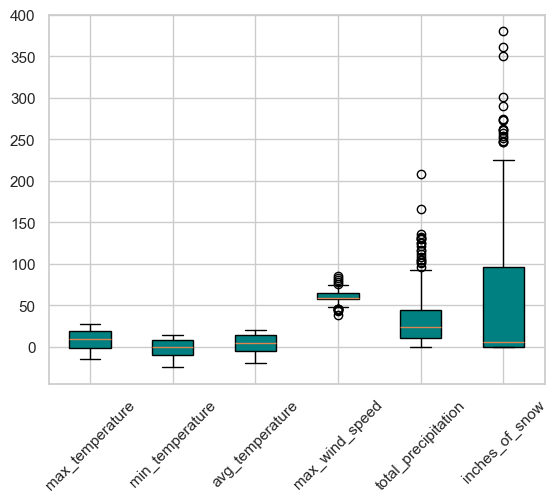

In [477]:
features = [feature for feature in df2.columns if feature not in ['date']]

plt.boxplot([df2[feature] for feature in features], 
            patch_artist=True, 
            boxprops=dict(facecolor='teal', color='black'))

plt.xticks(range(1, len(features) + 1), features, rotation=45)

### Prepare month as the prediction feature

In [478]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m')

# Extract month
df2['month'] = df2['date'].dt.month

# Compute cyclical features
df2['month_sin'] = np.sin(2 * np.pi * df1['month'] / 12)
df2['month_cos'] = np.cos(2 * np.pi * df1['month'] / 12)

In [483]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 320 non-null    datetime64[ns]
 1   max_temperature      320 non-null    float64       
 2   min_temperature      320 non-null    float64       
 3   avg_temperature      320 non-null    float64       
 4   max_wind_speed       320 non-null    float64       
 5   total_precipitation  320 non-null    float64       
 6   inches_of_snow       320 non-null    float64       
 7   month                320 non-null    int32         
 8   month_sin            320 non-null    float64       
 9   month_cos            320 non-null    float64       
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 23.9 KB


### Scale data

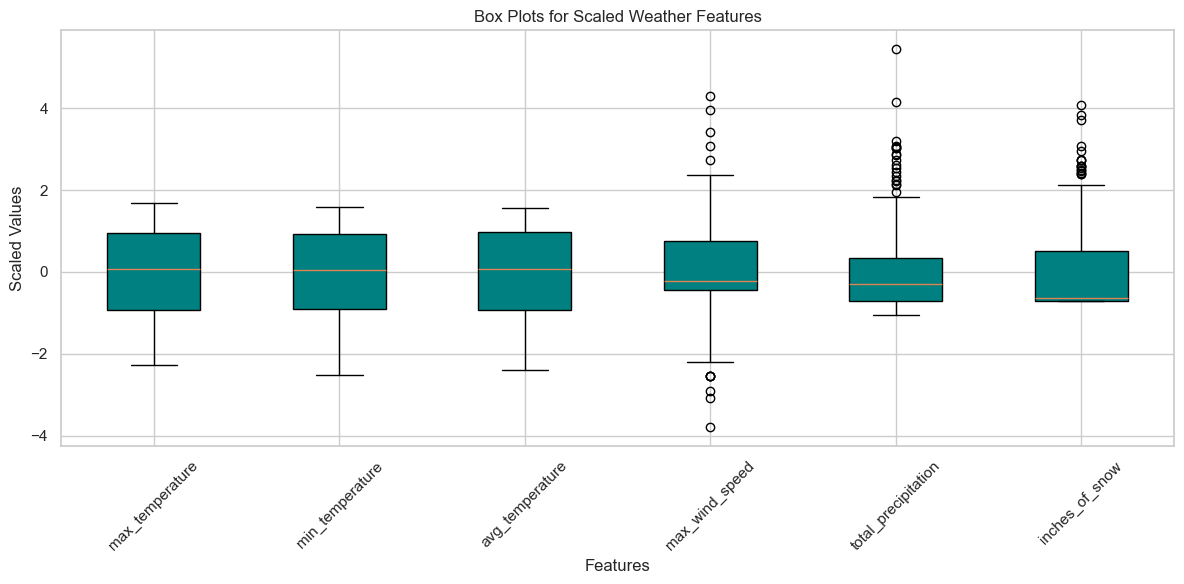

In [484]:
# Initialize the scaler
scaler2 = StandardScaler()

# Define your target columns
target_columns = ['max_temperature', 'min_temperature', 'avg_temperature', 'max_wind_speed', 
                  'total_precipitation', 'inches_of_snow']

# Apply scaling to your target data (assumes 'df1' is your dataframe containing the targets)
df2_scaled = df2.copy()  # Create a copy to keep original data intact

# Fit and transform the scaler on the target columns
df2_scaled[target_columns] = scaler2.fit_transform(df2[target_columns])

# --------------------------
# Box Plot Visualization
# --------------------------
plt.figure(figsize=(12, 6))

# Prepare data for box plots (only for scaled target columns)
data_for_boxplots = [df2_scaled[feature] for feature in target_columns]

# Create box plots
plt.boxplot(data_for_boxplots, patch_artist=True, boxprops=dict(facecolor='teal', color='black'))

# Customize plot
plt.xticks(range(1, len(target_columns) + 1), target_columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.title('Box Plots for Scaled Weather Features')
plt.tight_layout()
plt.show()


save scaler

In [486]:
# Save the scaler
joblib.dump(scaler2, 'station2_scaler.pkl')
print("Scaler saved as 'station2_scaler.pkl'")

Scaler saved as 'station2_scaler.pkl'


note: outliers are present due to seasonality

## Modeling  for Station 1

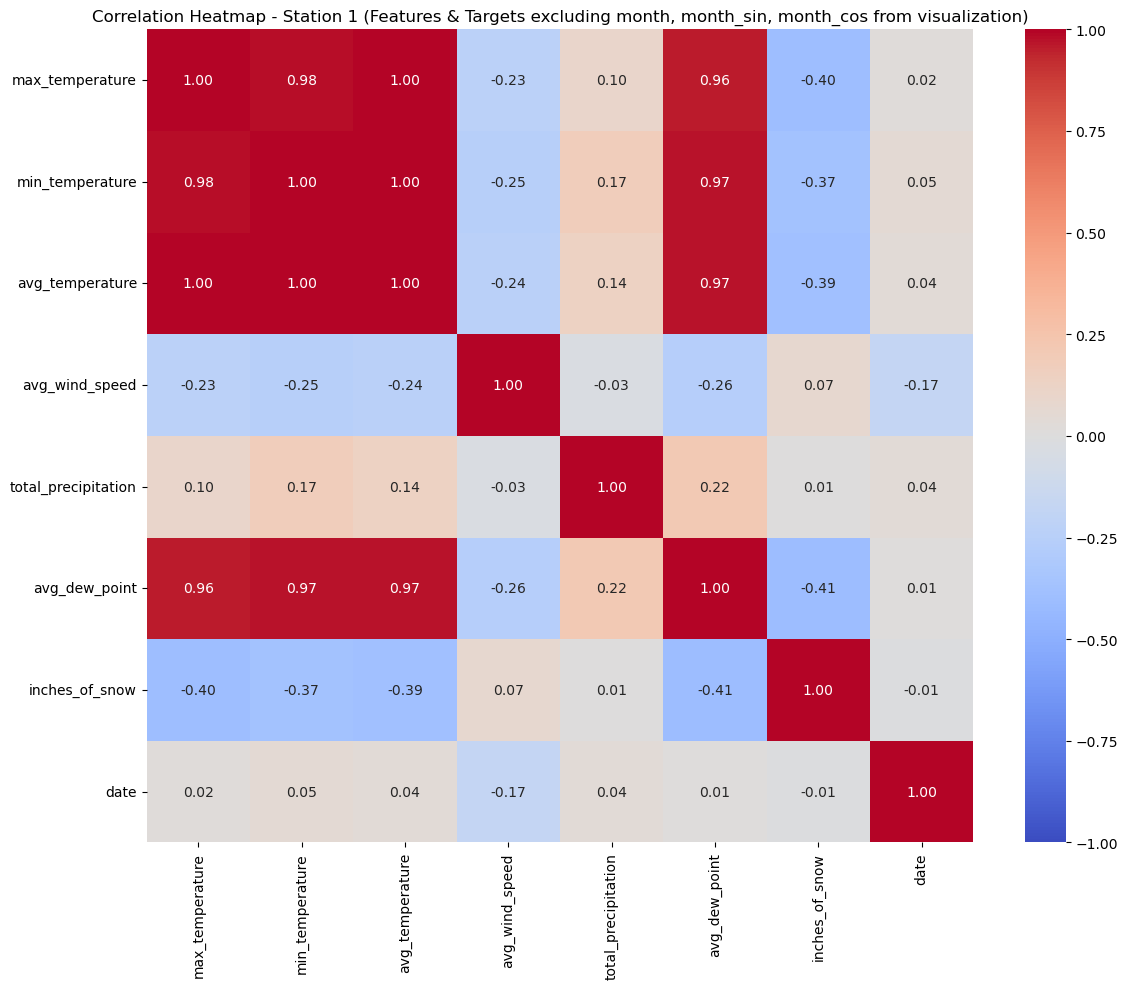

In [ ]:
# Compute the correlation matrix
corr_matrix = df1_scaled.corr()

# Plot the heatmap, excluding 'month', 'month_sin', 'month_cos' for visualization only
plt.figure(figsize=(12, 10))  # Adjust the size to fit the data better
sns.heatmap(corr_matrix.drop(columns=['month', 'month_sin', 'month_cos'], index=['month', 'month_sin', 'month_cos']),
            annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap - Station 1 (Features & Targets excluding month, month_sin, month_cos from visualization)")
plt.tight_layout()
plt.show()


In [ ]:
# Define the features (X) and targets (y)
X = df1_scaled[['month_sin', 'month_cos']]
y = df1_scaled[['max_temperature', 'min_temperature', 'avg_temperature', 
                'avg_wind_speed', 'total_precipitation', 'avg_dew_point', 'inches_of_snow']]



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ensure y_train and y_test are multi-dimensional (multi-output regression)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (776, 7)
y_test shape: (195, 7)


We have chosen the following variables as our targets: 
- `max_temperature`
- `min_temperature`
- `avg_temperature`
- `avg_wind_speed`
- `total_precipitation`
- `avg_dew_point`
- `inches_of_snow`

The following modeling approaches were selected to support our Multi-Output Model:

1. **Random Forest Regressor** (Ensemble Tree-Based)
2. **MultiOutputRegressor with Support Vector Regressor** (SVR)
3. **Multi-Layer Perceptron Regressor** (Neural Network) - Station 1 only
4. **ARIMA** - Station 2 only


In [ ]:
# Dictionary to store model performances
model_performances1 = {}

# Model 1: Tuning Random Forest Regressor

# Define the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=80),
    param_distributions=rf_param_grid,
    n_iter=15,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)
# Fit the model
rf_random.fit(X_train, y_train)
rf_model = rf_random.best_estimator_
y_pred_rf = rf_model.predict(X_test)

model_performances1['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Model 2: Tuning SVR (wrapped in MultiOutputRegressor)

# Define the parameter grid for SVR
svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['rbf', 'linear']
}

# MultiOutputRegressor with SVR
svr_model = MultiOutputRegressor(SVR())
svr_random = RandomizedSearchCV(
    svr_model,
    param_distributions=svr_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model (y_train and y_test are already in the correct shape)
svr_random.fit(X_train, y_train)
best_svr_model = svr_random.best_estimator_

# Predict on test data
y_pred_svr = best_svr_model.predict(X_test)

model_performances1['SVR (MultiOutput)'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# Model 3: Tuning MLP Regressor (with increased max_iter)

# Define the parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random = RandomizedSearchCV(
    MLPRegressor(max_iter=2000, random_state=80),  # Increased max_iter to 2000
    param_distributions=mlp_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model
mlp_random.fit(X_train, y_train)
mlp_model = mlp_random.best_estimator_
y_pred_mlp = mlp_model.predict(X_test)

model_performances1['MLP Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'MAE': mean_absolute_error(y_test, y_pred_mlp),
    'R2': r2_score(y_test, y_pred_mlp)
}

# Print model performances
for model_name, performance in model_performances1.items():
    print(f"{model_name} Performance:")
    for metric, score in performance.items():
        print(f"{metric}: {score:.4f}")
    print('-' * 50)


Random Forest Performance:
MSE: 0.4824
MAE: 0.3924
R2: 0.5617
--------------------------------------------------
SVR (MultiOutput) Performance:
MSE: 0.5163
MAE: 0.3828
R2: 0.5427
--------------------------------------------------
MLP Regressor Performance:
MSE: 0.4734
MAE: 0.3918
R2: 0.5716
--------------------------------------------------


Since we are working with multi-output regression, we use these metrics to measure performance:
- Mean Squared Error (MSE)

- Mean Absolute Error (MAE)

- R² Score (Coefficient of Determination) 

In [ ]:
# Display the metrics for each model
perf_df1 = pd.DataFrame(model_performances1).T
print("Model Performance Metrics:\n")
print(perf_df1.round(4))

Model Performance Metrics:

                      MSE     MAE      R2
Random Forest      0.4824  0.3924  0.5617
SVR (MultiOutput)  0.5163  0.3828  0.5427
MLP Regressor      0.4734  0.3918  0.5716


C:\Users\MC\AppData\Local\Temp\ipykernel_1692\574227666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\574227666.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(perf_df1.index, rotation=45)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\574227666.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\574227666.py:12: UserWarning: set_ticklabels

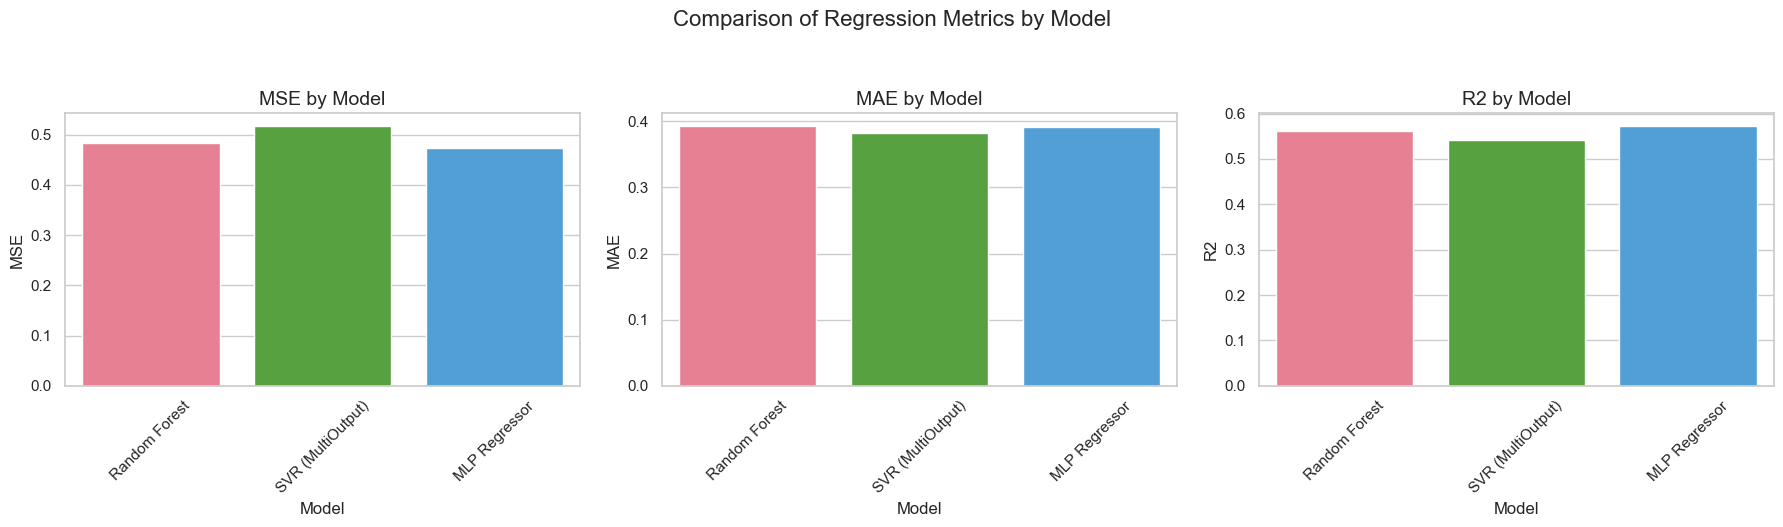

In [ ]:
# Visualizing the performance metrics
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(perf_df1))

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(['MSE', 'MAE', 'R2']):
    sns.barplot(x=perf_df1.index, y=perf_df1[metric].values, ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} by Model', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].set_xticklabels(perf_df1.index, rotation=45)

plt.suptitle('Comparison of Regression Metrics by Model', fontsize=16, y=1.05)

plt.tight_layout()
plt.show()

## Summary of Model Performance for station 1:

Random Forest: Solid performance with a reasonable balance between MSE, MAE, and R², but slightly weaker than the MLP Regressor in terms of R².

SVR (MultiOutput): Performs well, but with higher MSE and MAE compared to the other models, and a slightly lower R².

MLP Regressor: Best overall performance with the highest R², lowest MSE, and competitive MAE, making it the best model for monthly weather prediction.

Given these metrics, the MLP Regressor is the best choice for the data.

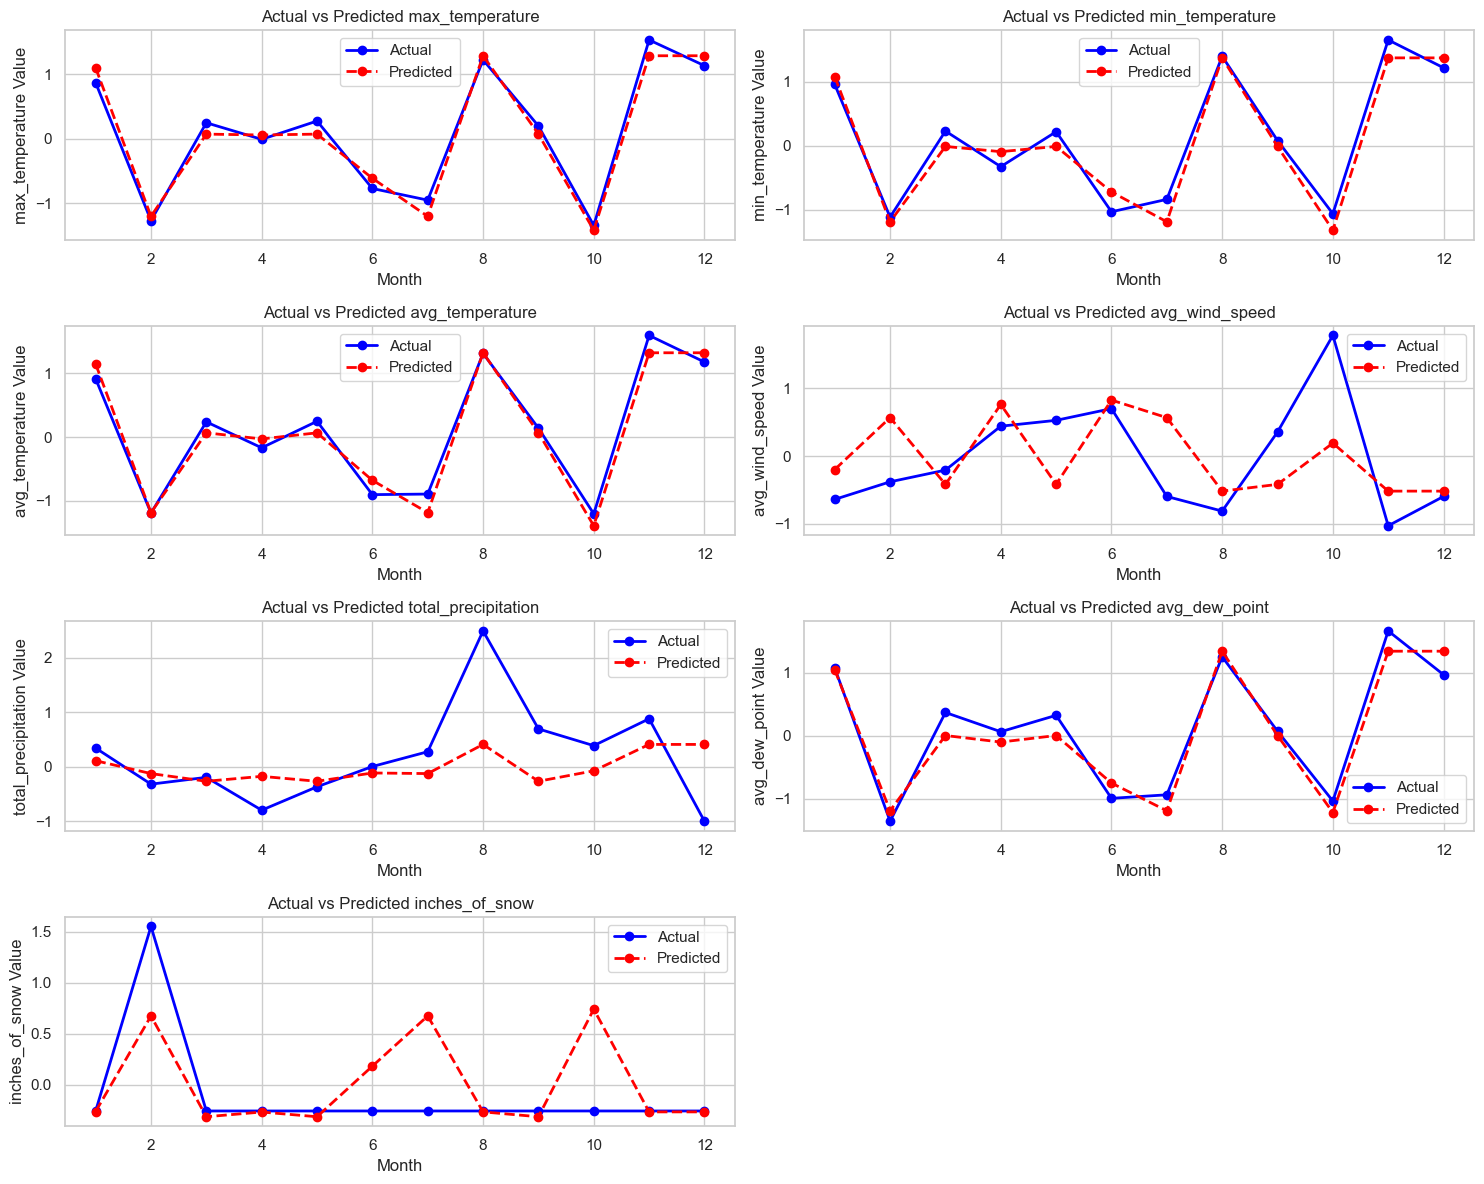

In [ ]:
import matplotlib.pyplot as plt

# List of all target variables
target_variables = ['max_temperature', 'min_temperature', 'avg_temperature', 
                    'avg_wind_speed', 'total_precipitation', 'avg_dew_point', 'inches_of_snow']

# Create a figure with subplots
plt.figure(figsize=(15, 12))

# Loop through each target variable and plot
for idx, target_variable in enumerate(target_variables, 1):
    # Select the first 12 months for both actual and predicted values (from y_test and predictions)
    months = list(range(1, 13))  # Assuming the months are from 1 to 12
    actual_values = y_test[target_variable].iloc[:12].values
    predicted_values = y_pred_best_model[:12, y_test.columns.get_loc(target_variable)]

    # Create a subplot for each target variable
    plt.subplot(4, 2, idx)  # 4 rows and 2 columns of subplots
    plt.plot(months, actual_values, label='Actual', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
    plt.plot(months, predicted_values, label='Predicted', marker='o', color='red', linestyle='--', linewidth=2, markersize=6)

    # Add labels, title, and legend
    plt.xlabel('Month')
    plt.ylabel(f'{target_variable} Value')
    plt.title(f'Actual vs Predicted {target_variable}')
    plt.legend()

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()


Save the best model in station1_model.pkl

In [ ]:
import os
import pickle

# Define the relative path to save the model
relative_path = r'../artifacts/station1_model.pkl'

# Ensure the directory exists
os.makedirs(os.path.dirname(relative_path), exist_ok=True)

# Save the best model and associated information
best_model_station1 = rf_random.best_estimator_  # This assumes the best model comes from RandomizedSearchCV

# If using a different model, replace rf_random.best_estimator_ with that model
# For example, if your best model was an SVR or MLP model, you'd assign that here.

# Save Station 1 model information
station1_data = {
    'model': best_model_station1,
    'scaler': scaler1,  # This is the scaler for the target variables
    'feature_names': list(X_train.columns)  # These are the feature names for X (input data)
}

# Write the model to a file
with open(relative_path, 'wb') as f:
    pickle.dump(station1_data, f)

print(f"Station 1 model saved successfully to {relative_path}.")


Station 1 model saved successfully to ../artifacts/station1_model.pkl.


## Modeling for Station 2 

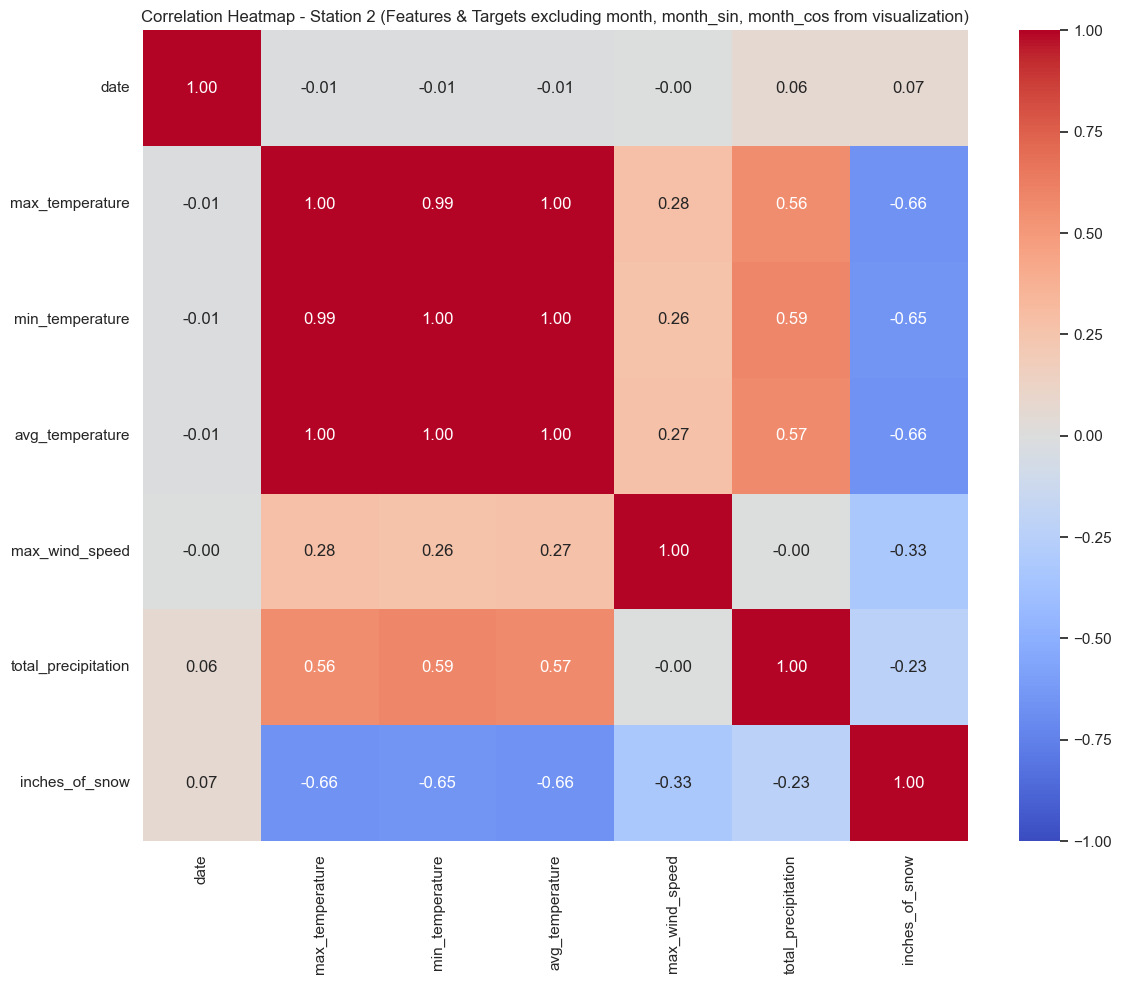

In [488]:
# Compute the correlation matrix
corr_matrix = df2_scaled.corr()

# Plot the heatmap, excluding 'month', 'month_sin', 'month_cos' for visualization only
plt.figure(figsize=(12, 10))  # Adjust the size to fit the data better
sns.heatmap(corr_matrix.drop(columns=['month', 'month_sin', 'month_cos'], index=['month', 'month_sin', 'month_cos']),
            annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)

plt.title("Correlation Heatmap - Station 2 (Features & Targets excluding month, month_sin, month_cos from visualization)")
plt.tight_layout()
plt.show()


In [492]:
df2_scaled.drop(columns=['date', 'month'], inplace=True)

In [495]:
df2_scaled.head()

max_temperature  min_temperature  avg_temperature  max_wind_speed  \
0        -0.124066        -0.240369        -0.179098       -0.053754   
1         0.615047         0.624598         0.620690        0.965554   
2         0.939466         1.153543         1.042052       -0.334942   
3         1.170791         1.250004         1.209798       -0.018605   
4         1.189598         1.231984         1.211795        0.262583   

   total_precipitation  inches_of_snow     month_sin     month_cos  
0            -0.002070       -0.397584  1.224647e-16 -1.000000e+00  
1            -0.545244       -0.699299 -5.000000e-01 -8.660254e-01  
2             4.143536       -0.699299 -8.660254e-01 -5.000000e-01  
3             0.790839       -0.699299 -1.000000e+00 -1.836970e-16  
4             0.572321       -0.699299 -8.660254e-01  5.000000e-01

In [496]:
# Define the features (X) and targets (y)
X = df2_scaled[['month_sin', 'month_cos']]
y = df2_scaled[['max_temperature', 'min_temperature', 'avg_temperature', 
                'max_wind_speed', 'total_precipitation', 'inches_of_snow']]


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Ensure y_train and y_test are multi-dimensional (multi-output regression)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (256, 6)
y_test shape: (64, 6)


In [497]:
# Dictionary to store model performances
model_performances2 = {}

# Model 1: Tuning random forest regressor
# Define the parameter grid for random forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=80),
    param_distributions=rf_param_grid,
    n_iter=15,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model
rf_random.fit(X_train, y_train)
rf_model = rf_random.best_estimator_
y_pred_rf = rf_model.predict(X_test)

model_performances2['Random Forest'] = {
    'MSE': mean_squared_error(y_test, y_pred_rf),
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Model 2: Tuning SVR (wrapped in MultiOutputRegressor)
# Define the parameter grid for SVR
svr_param_grid = {
    'estimator__C': [0.1, 1, 10],
    'estimator__epsilon': [0.01, 0.1, 1],
    'estimator__kernel': ['rbf', 'linear']
}

# MultiOutputRegressor with SVR
svr_model = MultiOutputRegressor(SVR())
svr_random = RandomizedSearchCV(
    svr_model,
    param_distributions=svr_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model (y_train and y_test are already in the correct shape)
svr_random.fit(X_train, y_train)
best_svr_model = svr_random.best_estimator_

# Predict on test data
y_pred_svr = best_svr_model.predict(X_test)

model_performances2['SVR (MultiOutput)'] = {
    'MSE': mean_squared_error(y_test, y_pred_svr),
    'MAE': mean_absolute_error(y_test, y_pred_svr),
    'R2': r2_score(y_test, y_pred_svr)
}

# Model 3: MLP Regressor
# Define the parameter grid for MLP
mlp_param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive']
}

mlp_random = RandomizedSearchCV(
    MLPRegressor(max_iter=500, random_state=80),
    param_distributions=mlp_param_grid,
    n_iter=10,
    cv=KFold(n_splits=3, shuffle=True, random_state=80),
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=80
)

# Fit the model
mlp_random.fit(X_train, y_train)
mlp_model = mlp_random.best_estimator_
y_pred_mlp = mlp_model.predict(X_test)

model_performances2['MLP Regressor'] = {
    'MSE': mean_squared_error(y_test, y_pred_mlp),
    'MAE': mean_absolute_error(y_test, y_pred_mlp),
    'R2': r2_score(y_test, y_pred_mlp)
}


In [498]:
# Display the metrics for each model
perf_df2 = pd.DataFrame(model_performances2).T
print("Model Performance Metrics:\n")
print(perf_df2.round(4))

Model Performance Metrics:

                      MSE     MAE      R2
Random Forest      0.6391  0.6429  0.2475
SVR (MultiOutput)  0.6659  0.6821  0.2184
MLP Regressor      0.6339  0.6360  0.2531


C:\Users\MC\AppData\Local\Temp\ipykernel_1692\3806581533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\3806581533.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(perf_df2.index, rotation=45)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\3806581533.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
C:\Users\MC\AppData\Local\Temp\ipykernel_1692\3806581533.py:13: UserWarning: set_tickla

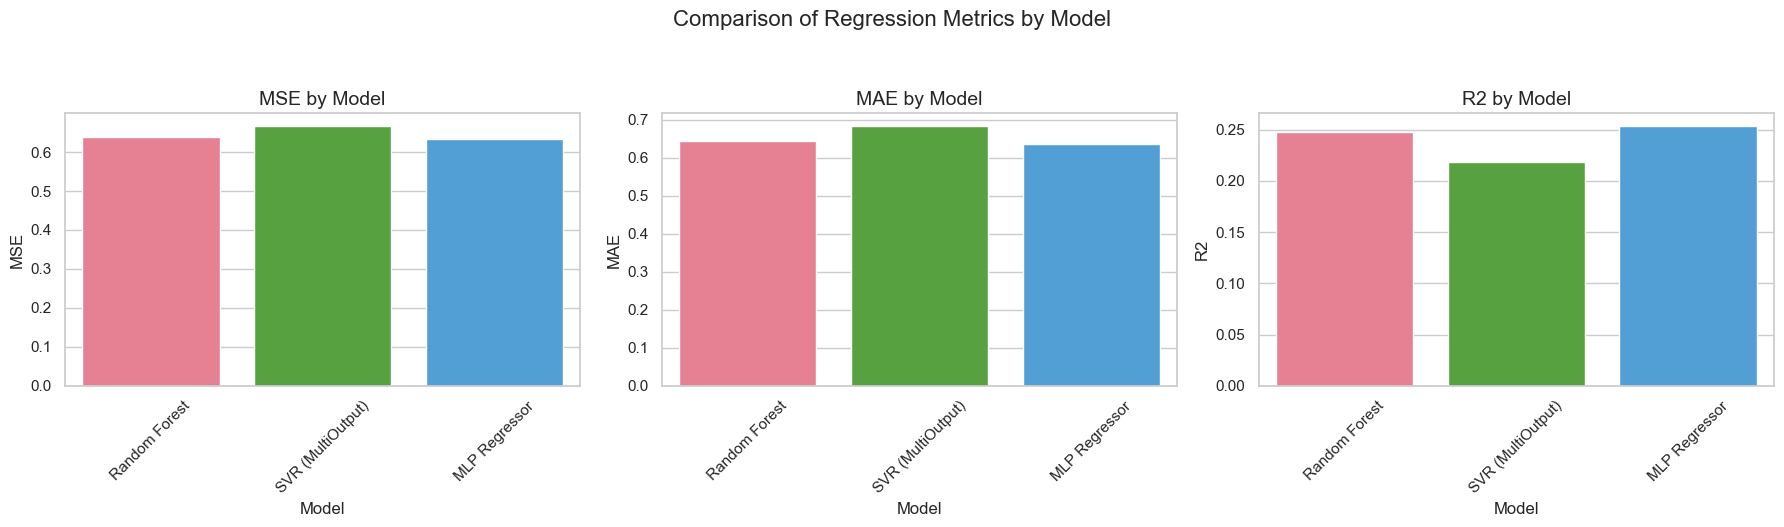

In [499]:
# Visualizing the performance metrics
sns.set(style="whitegrid")
colors = sns.color_palette("husl", len(perf_df2))


fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=False)

for i, metric in enumerate(['MSE', 'MAE', 'R2']):
    sns.barplot(x=perf_df2.index, y=perf_df2[metric].values, ax=axes[i], palette=colors)
    axes[i].set_title(f'{metric} by Model', fontsize=14)
    axes[i].set_ylabel(metric)
    axes[i].set_xlabel('Model')
    axes[i].set_xticklabels(perf_df2.index, rotation=45)


plt.suptitle('Comparison of Regression Metrics by Model', fontsize=16, y=1.05)


plt.tight_layout()
plt.show()

## Summary of Model Performance for station 2:

**MLP Regressor**: Best overall performance with the lowest MSE and MAE, and the highest R2.

**Random Forest**: Very close performance to MLP, with slightly higher MSE and MAE, and a slightly lower R2 value.

**SVR (MultiOutput)**: Good performance but not as strong as MLP, with the highest MSE and MAE, and the lowest R2.

Given these metrics, the **MLP Regressor** model is the best choice for the data.

Save the best model in station2_model.pkl

In [502]:
import os
import pickle

relative_path = r'../artifacts/station2_model.pkl'

os.makedirs(os.path.dirname(relative_path), exist_ok=True)

# Assuming mlp_model is the best model after tuning
best_model_station2 = mlp_model  

# Save Station 2 model
station2_data = {
    'model': best_model_station2,
    'scaler': scaler2,  # Make sure to use scaler2 since you used it for scaling the targets
    'feature_names': list(X_train.columns)
}

# Save the model
with open(relative_path, 'wb') as f:
    pickle.dump(station2_data, f)

print(f"Station 2 model saved successfully to {relative_path}.")


Station 2 model saved successfully to ../artifacts/station2_model.pkl.


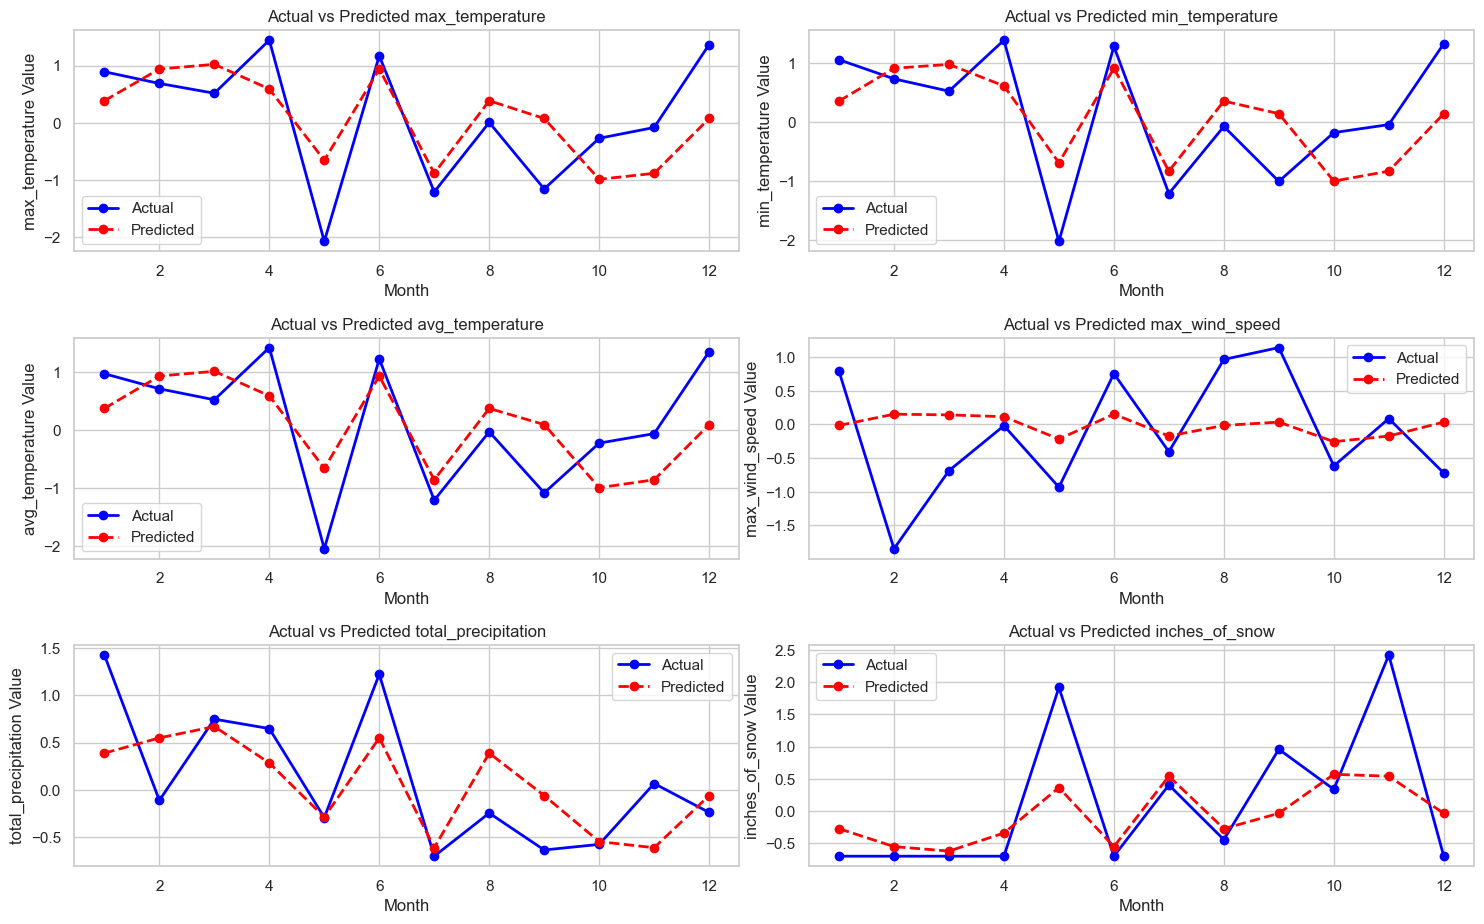

In [503]:
# List of all target variables
target_variables = ['max_temperature', 'min_temperature', 'avg_temperature', 
                    'max_wind_speed', 'total_precipitation', 'inches_of_snow']

# Create a figure with subplots
plt.figure(figsize=(15, 12))

# Loop through each target variable and plot
for idx, target_variable in enumerate(target_variables, 1):
    # Select the first 12 months for both actual and predicted values (from y_test and predictions)
    months = list(range(1, 13))  # Assuming the months are from 1 to 12
    actual_values = y_test[target_variable].iloc[:12].values
    predicted_values = y_pred_mlp[:12, y_test.columns.get_loc(target_variable)]  # Get the corresponding predicted values for MLP

    # Create a subplot for each target variable
    plt.subplot(4, 2, idx)  # 4 rows and 2 columns of subplots
    plt.plot(months, actual_values, label='Actual', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
    plt.plot(months, predicted_values, label='Predicted', marker='o', color='red', linestyle='--', linewidth=2, markersize=6)

    # Add labels, title, and legend
    plt.xlabel('Month')
    plt.ylabel(f'{target_variable} Value')
    plt.title(f'Actual vs Predicted {target_variable}')
    plt.legend()

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()
